In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from wordcloud import WordCloud
import twint
import nest_asyncio

nest_asyncio.apply()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

https://github.com/twintproject/twin Twint is used to webscrape tweets about movies. For 15 movies, tweets will be scraped over the year of the movies release. My aim is to have around 5000 tweets after cleaning non English tweets from the dataframe. The last movie, Hocus Pocus, will have tweets collected from October 2014 until October 2015 even though the movie came out in 1993. 
In the VADER notebook critics rating will be compared with users rating, per movie. **Business Problem**: Can crtics accurately assess consumer movie sentiment?

# Inception

In [5]:
#gather tweets from the movie Inception
c = twint.Config()
c.Search = "Inception"
c.Limit = 6000
c.Since = "2010-07-13" #released July 13, 2010
c.Until = "2011-07-13"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [4]:
#convert data into a dataframe
df_1 = twint.storage.panda.Tweets_df
df_1.head()

id    conversation_id    created_at                 date  \
0  90570989376774144  90570989376774144  1.310429e+12  2011-07-11 19:59:41   
1  90570938395004929  90570938395004929  1.310429e+12  2011-07-11 19:59:29   
2  90570857965039616  90570857965039616  1.310429e+12  2011-07-11 19:59:09   
3  90570801786531840  90570801786531840  1.310429e+12  2011-07-11 19:58:56   
4  90570663047331841  90570663047331841  1.310429e+12  2011-07-11 19:58:23   

  timezone place                                              tweet language  \
0    -0500                    Who understands that Inception movie?       en   
1    -0500        Inception in my pants #improvefilmtitlesbyaddi...       en   
2    -0500            RT @ imNot_daFather #GreatHighMovie Inception       en   
3    -0500                        Excellence in Cinema....INCEPTION       fr   
4    -0500                                      never saw inception       en   

                               hashtags cashtags  ...  geo source user_rt_id  \
0                                    []       []  ...                          
1  [improvefilmtitlesbyaddinginmypants]       []  ...                          
2                      [greathighmovie]       []  ...                          
3                                    []       []  ...                          
4                                    []       []  ...                          

  user_rt  retweet_id reply_to retweet_date translate trans_src  trans_dest  
0                           []                                               
1                           []                                               
2                           []                                               
3                           []                                               
4                           []                                               

[5 rows x 38 columns]

In [9]:
# remove non-English tweets
df_1 = df_1[df_1['language'] == 'en']

In [10]:
#after removing non-English tweets the dataframe looses 900 tweets
df_1.shape

(5100, 38)

Uncomment and run the next cell to save df_1 dataframe

In [12]:
# df_1.to_csv('df_1.csv')

Uncomment and run the next cell to read df_1 back in

In [6]:
# df_1 = pd.read_csv('df_1.csv')

In [7]:
#isolating the tweets
tweets = df_1['tweet'].values
tweets

array(['Who understands that Inception movie?',
       'Inception in my pants #improvefilmtitlesbyaddinginmypants',
       'RT @ imNot_daFather #GreatHighMovie Inception', ...,
       'A ver "Inception" :D #TP',
       'Lady Austin was right 2 bail on Inception. I would have done better with  2 hr nap filled with dreams. My dreams just as visually great. LOL',
       "Inception is in IMDB's top 100 #itsdefinitely2011"], dtype=object)

In [8]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in tweets:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# print(tokenized_tweets)

In [10]:
#creating a stop words list - these words don't add much value
from nltk.corpus import stopwords
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
#isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [12]:
#freqDist - frequency of words within a text, in this case tweets about Inception
fdist = FreqDist(tweets)

In [13]:
#finding the 25 most common words
fdist.most_common(25)

[('inception', 5195),
 ('pants', 2099),
 ('improvefilmtitlesbyaddinginmypants', 1526),
 ('movie', 362),
 ('watching', 361),
 ('dream', 310),
 ('like', 304),
 ('watch', 239),
 ('time', 192),
 ('lol', 189),
 ('bit', 144),
 ('good', 132),
 ('watched', 131),
 ('since', 114),
 ('within', 110),
 ('one', 101),
 ('dreams', 98),
 ('first', 93),
 ('think', 84),
 ('gonna', 83),
 ('mind', 82),
 ('really', 79),
 ('see', 77),
 ('still', 73),
 ('last', 73)]

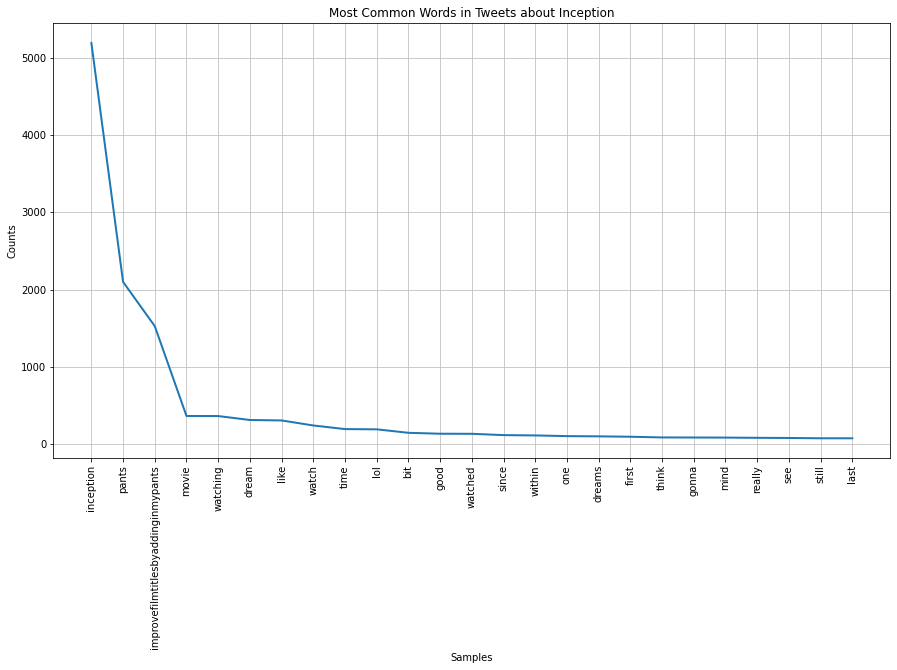

In [10]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets about Inception")

In [11]:
# from fdist.most_common(25) seperate words and counts
inception_words = [x[0] for x in fdist.most_common(25)]
print(inception_words)
inception_counts = [x[1] for x in fdist.most_common(25)]
print(inception_counts)

['inception', 'pants', 'improvefilmtitlesbyaddinginmypants', 'movie', 'watching', 'dream', 'like', 'watch', 'time', 'lol', 'bit', 'good', 'watched', 'since', 'within', 'one', 'dreams', 'first', 'think', 'gonna', 'mind', 'really', 'see', 'still', 'last']
[5195, 2099, 1526, 362, 361, 310, 304, 239, 192, 189, 144, 132, 131, 114, 110, 101, 98, 93, 84, 83, 82, 79, 77, 73, 73]


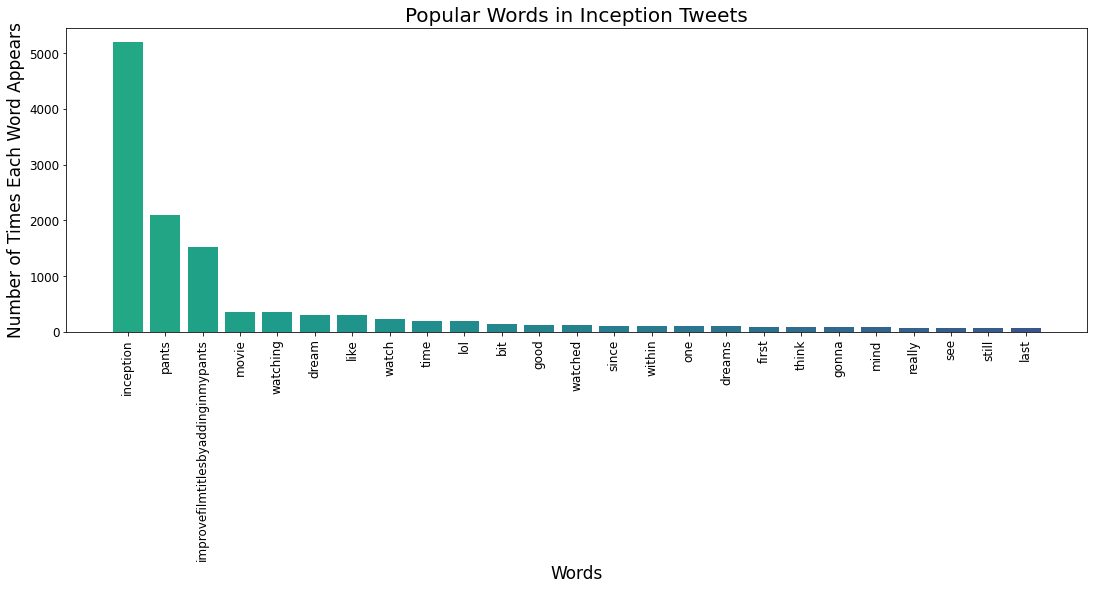

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(inception_words, inception_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Number of Times Each Word Appears', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Inception Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barInception.png')

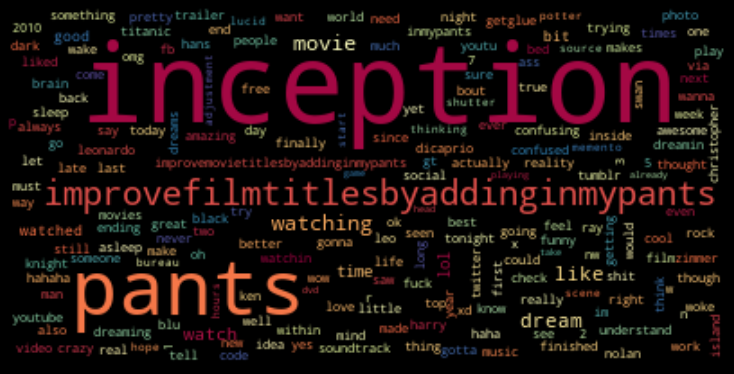

In [14]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# Uncomment the next line if you want to save your image:
# plt.savefig('images/inceptionwordcloud.jpg')

# Ingrid Goes West

In [6]:
#gather tweets from the movie Ingrid Goes West
c = twint.Config()
c.Search = "Ingrid Goes West"
c.Limit = 6000
c.Since = "2017-08-25" #release date August 25, 2017
c.Until = "2018-08-25"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [7]:
#create dataframe
df_2 = twint.storage.panda.Tweets_df
df_2.head()

id      conversation_id    created_at  \
0  1032762047539437568  1032762047539437568  1.535065e+12   
1  1032742273644224516  1032742273644224516  1.535060e+12   
2  1032735537424228352  1032735537424228352  1.535058e+12   
3  1032674022243192833  1032674014076882944  1.535044e+12   
4  1032669255165071360  1032669255165071360  1.535043e+12   

                  date timezone place  \
0  2018-08-23 18:50:34    -0500         
1  2018-08-23 17:32:00    -0500         
2  2018-08-23 17:05:14    -0500         
3  2018-08-23 13:00:47    -0500         
4  2018-08-23 12:41:51    -0500         

                                               tweet language  \
0  Another day another avocado toast. #avocadotoa...       en   
1  #IngridGoesWest is a total package when you wa...       en   
2  'Ingrid goes West' satiriza el vacío existenci...       es   
3  44. Step 45. The dark tower 46. Ingrid goes we...       en   
4           #IngridGoesWest  https://t.co/5LpLKDAfpl      und   

                                         hashtags cashtags  ...  geo source  \
0  [avocadotoast, ingridgoeswest, 31days31photos]       []  ...               
1                                [ingridgoeswest]       []  ...               
2                                              []       []  ...               
3                                              []       []  ...               
4                                [ingridgoeswest]       []  ...               

  user_rt_id user_rt  retweet_id reply_to retweet_date translate trans_src  \
0                                      []                                    
1                                      []                                    
2                                      []                                    
3                                      []                                    
4                                      []                                    

   trans_dest  
0              
1              
2              
3              
4              

[5 rows x 38 columns]

In [8]:
# remove non-English tweets
df_2 = df_2[df_2['language'] == 'en']
df_2.shape

(5162, 38)

Uncomment and run the next cell to create df_2

In [24]:
# df_2.to_csv('df_2.csv')

Uncomment and run the next cell to read in df_2

In [14]:
# df_2 = pd.read_csv('df_2.csv')

In [15]:
#isolate the tweets
tweets_ingrid = df_2['tweet'].values
tweets_ingrid

array(['Another day another avocado toast. #avocadotoast🥑🍞 #ingridgoeswest #31days31photos  https://t.co/zGEkN5uKvU',
       '#IngridGoesWest is a total package when you want to advise your sorry-ass, SM addictive self. Love for oneself is key and should not be influenced by SM. It tells the story of addiction, fake life, forcing to belong,giving up and more. A must watch',
       '44. Step 45. The dark tower 46. Ingrid goes west 47. Naked ( 2017 ) 48. Good time 49. The nut job 2 50. The wound 51. A gentleman  52. The beach rats',
       ..., 'Pls watch Ingrid goes west lmao',
       '@hellomattspicer i am now officially a huge fan. watched #ingridgoeswest on my flight to the superbowl. what fantastic work. 👏🏻',
       '@BWDR Ingrid Goes West. Such an amazing portrayal of mental health deterioration in connection with social media  https://t.co/5wJa17krr8'],
      dtype=object)

In [16]:
#tokenize tweets
tokenized_tweets = []
for tweet in tweets_ingrid:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #lowercase to minimize duplicates
     
# print(tokenized_tweets)

In [17]:
#isolate each word
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list: #do not include stop words
            tweets.append(word)  

# tweets

In [19]:
#freqDist - frequency of words within a text, in this case tweets about Ingrid Goes West
fdist = FreqDist(tweets)

In [20]:
#most common words in tweet
fdist.most_common(25)

[('ingrid', 4349),
 ('goes', 4251),
 ('west', 4226),
 ('ingridgoeswest', 1114),
 ('movie', 725),
 ('2017', 472),
 ('good', 436),
 ('watching', 415),
 ('watch', 413),
 ('aubrey', 412),
 ('plaza', 412),
 ('watched', 403),
 ('evilhag', 359),
 ('like', 346),
 ('social', 324),
 ('film', 320),
 ('media', 308),
 ('win', 273),
 ('best', 259),
 ('dvd', 259),
 ('really', 237),
 ('movies', 230),
 ('great', 211),
 ('last', 196),
 ('love', 194)]

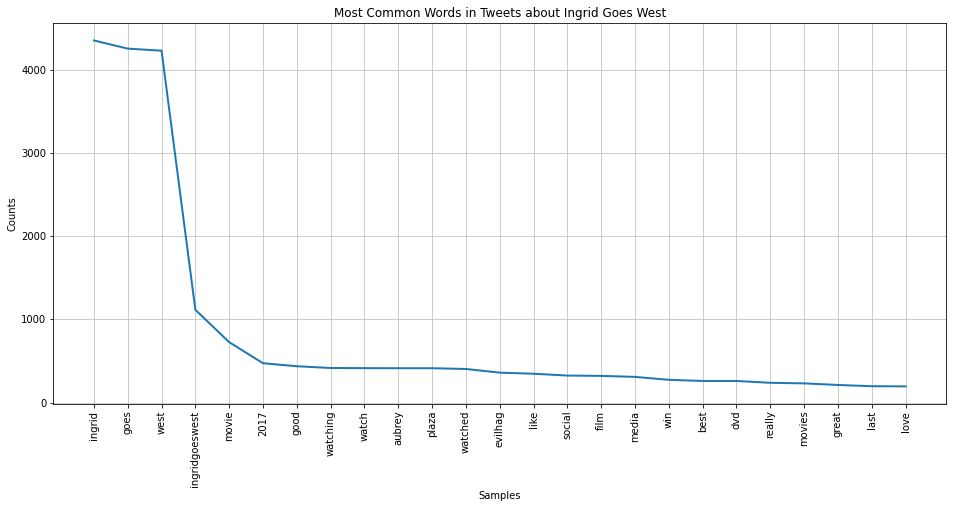

In [21]:
#line plot
plt.figure(figsize=(16,7))
ax = fdist.plot(25, title="Most Common Words in Tweets about Ingrid Goes West")

In [22]:
# from fdist.most_common(25) seperate words and counts
ingridgoeswest_words = [x[0] for x in fdist.most_common(25)]
print(ingridgoeswest_words)
ingridgoeswest_counts = [x[1] for x in fdist.most_common(25)]
print(ingridgoeswest_counts)

['ingrid', 'goes', 'west', 'ingridgoeswest', 'movie', '2017', 'good', 'watching', 'watch', 'aubrey', 'plaza', 'watched', 'evilhag', 'like', 'social', 'film', 'media', 'win', 'best', 'dvd', 'really', 'movies', 'great', 'last', 'love']
[4349, 4251, 4226, 1114, 725, 472, 436, 415, 413, 412, 412, 403, 359, 346, 324, 320, 308, 273, 259, 259, 237, 230, 211, 196, 194]


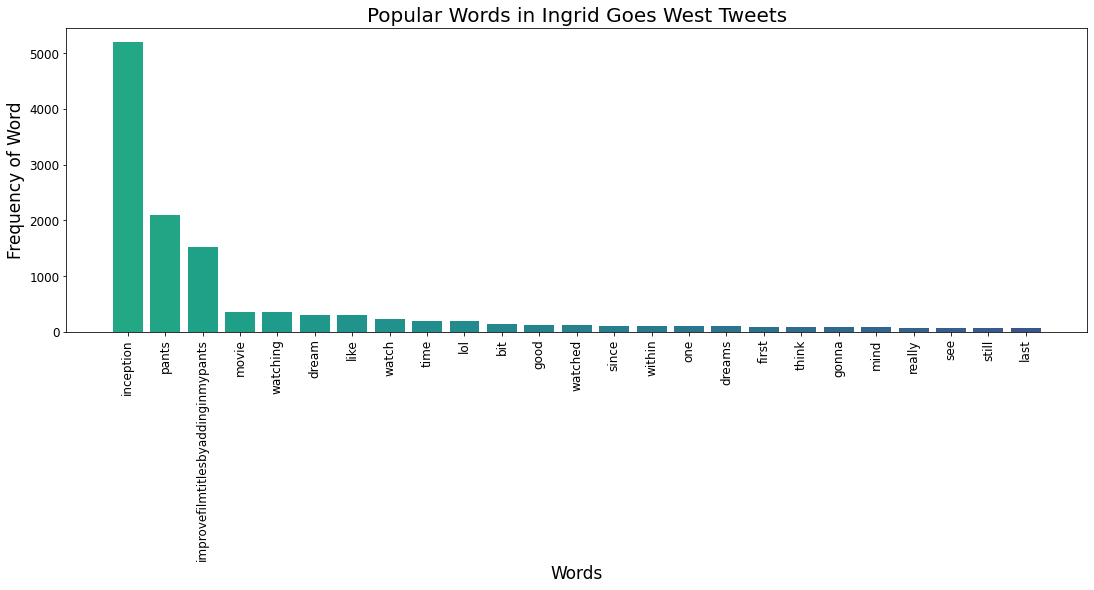

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(inception_words, inception_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Ingrid Goes West Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barIngrid.png')

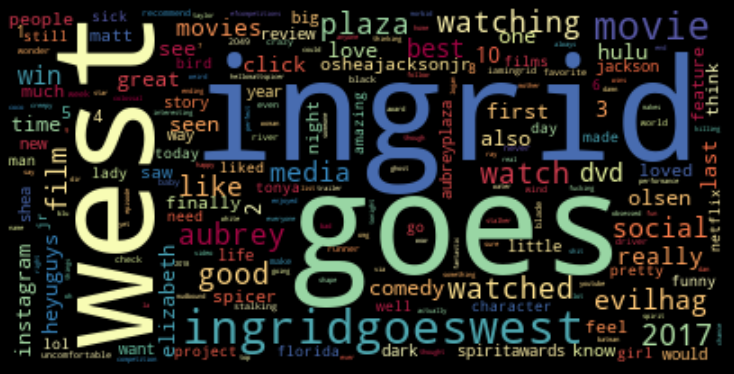

In [23]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display image with matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudingridgoeswest')

# The Big Sick

In [7]:
#gather tweets from the movie The Big Sick
c = twint.Config()
c.Search = "The Big Sick"
c.Limit = 6000
c.Since = "2017-07-14" #release date July 14, 2017
c.Until = "2018-07-14"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [24]:
#create dataframe of tweets about The Big Sick
df_3 = twint.storage.panda.Tweets_df
df_3.head()

id      conversation_id    created_at  \
0  1017554234919682048  1017499949871685632  1.531439e+12   
1  1017550612098093056  1017550612098093056  1.531438e+12   
2  1017544781281595393  1017544781281595393  1.531437e+12   
3  1017519513913511937  1017499949871685632  1.531431e+12   
4  1017493554925621248  1017493554925621248  1.531424e+12   

                  date timezone place  \
0  2018-07-12 19:40:09    -0500         
1  2018-07-12 19:25:45    -0500         
2  2018-07-12 19:02:35    -0500         
3  2018-07-12 17:22:11    -0500         
4  2018-07-12 15:39:02    -0500         

                                               tweet language hashtags  \
0  @kumailn I just saw the Big Sick and you are a...       en       []   
1  @kumailn Just finished The Big Sick.  It was s...       en       []   
2  I added a video to a @YouTube playlist  https:...       en       []   
3  @kumailn damn why did I just now watch the big...       en       []   
4  At the beginning of a relationship: “omg you’r...       en       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id  \
0       []  ...                                              
1       []  ...                                              
2       []  ...                                              
3       []  ...                                              
4       []  ...                                              

                                            reply_to retweet_date translate  \
0  [{'screen_name': 'kumailn', 'name': 'Kumail Na...                          
1                                                 []                          
2                                                 []                          
3  [{'screen_name': 'kumailn', 'name': 'Kumail Na...                          
4                                                 []                          

  trans_src  trans_dest  
0                        
1                        
2                        
3                        
4                        

[5 rows x 38 columns]

In [25]:
# remove non-English tweets
df_3 = df_3[df_3['language'] == 'en']

In [26]:
#shape after non-English tweets removed
df_3.shape

(5349, 38)

Uncomment and run the next line of code to  create df_3 dataframe

In [27]:
# df_3.to_csv('df_3.csv')

Uncomment and run the next line of code to to read in df_3

In [18]:
# df_3 = pd.read_csv('df_3.csv')

In [19]:
#isolate the tweets before tokenizing the tweets
tweets_bigS = df_3['tweet'].values
tweets_bigS

array(['@kumailn I just saw the Big Sick and you are amazing and I am so happy your wife has recovered. 🙏🙏🙏',
       '@kumailn Just finished The Big Sick.  It was so fucking good!!!!',
       "I added a video to a @YouTube playlist  https://t.co/3OXCF1nuDY S5E29: 2017's The Big Sick",
       ...,
       'the only movies I saw last year were Wonder Woman...Black Panther....Coco....TLJ and The Big Sick....(and a handful of kids stuff I care to never mention again)',
       'My Top 11 for Best Picture Oscar as of today:  1. Get Out 2. The Shape of Water 3. Wonder Woman 4. When We Rise 5. Logan 6. Mudbound 7. Girls Trip 8. Darkest Hour 9. I, Tonya 10. The Big Sick 11. Wonder   Note: Getting Three Billboards, Lady Bird and Florida Project Tuesday',
       '@RobbieBarstool Get Out, Billboards, and The Big Sick were all better by a considerable margin (I liked shape of water too)'],
      dtype=object)

In [20]:
#tokenize the tweets
tokenized_tweets = []
for tweet in tweets_bigS:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #make all tweets lowercase to avoid duplicates later on
        
# print(tokenized_tweets)

In [21]:
#isolate each word within a tweet, not including stop words
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [8]:
#freqDist - frequency of words within a text, in this case tweets about The Big Sick
fdist = FreqDist(tweets)

In [9]:
#25 most common words in Big Sick tweets
fdist.most_common(25)

[('big', 5523),
 ('sick', 5434),
 ('kumailn', 1000),
 ('movie', 761),
 ('good', 461),
 ('2017', 446),
 ('watched', 446),
 ('watching', 411),
 ('love', 399),
 ('like', 389),
 ('kumail', 354),
 ('watch', 350),
 ('film', 296),
 ('one', 290),
 ('great', 290),
 ('movies', 266),
 ('really', 258),
 ('loved', 252),
 ('time', 252),
 ('seen', 249),
 ('best', 244),
 ('finally', 232),
 ('nanjiani', 232),
 ('last', 224),
 ('story', 192)]

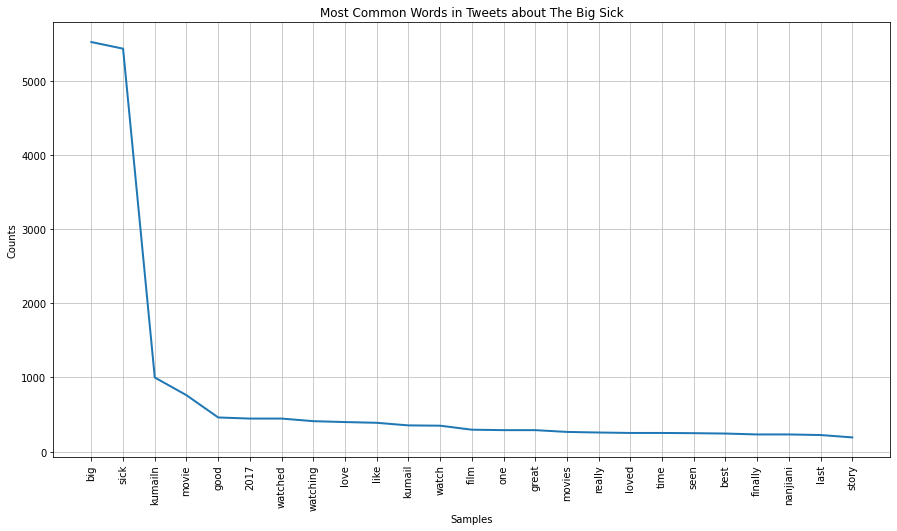

In [10]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets about The Big Sick")

In [12]:
# from fdist.most_common(25) seperate words and counts
bigsick_words = [x[0] for x in fdist.most_common(25)]
print(bigsick_words)
bigsick_counts = [x[1] for x in fdist.most_common(25)]
print(bigsick_counts)

['big', 'sick', 'kumailn', 'movie', 'good', '2017', 'watched', 'watching', 'love', 'like', 'kumail', 'watch', 'film', 'one', 'great', 'movies', 'really', 'loved', 'time', 'seen', 'best', 'finally', 'nanjiani', 'last', 'story']
[5523, 5434, 1000, 761, 461, 446, 446, 411, 399, 389, 354, 350, 296, 290, 290, 266, 258, 252, 252, 249, 244, 232, 232, 224, 192]


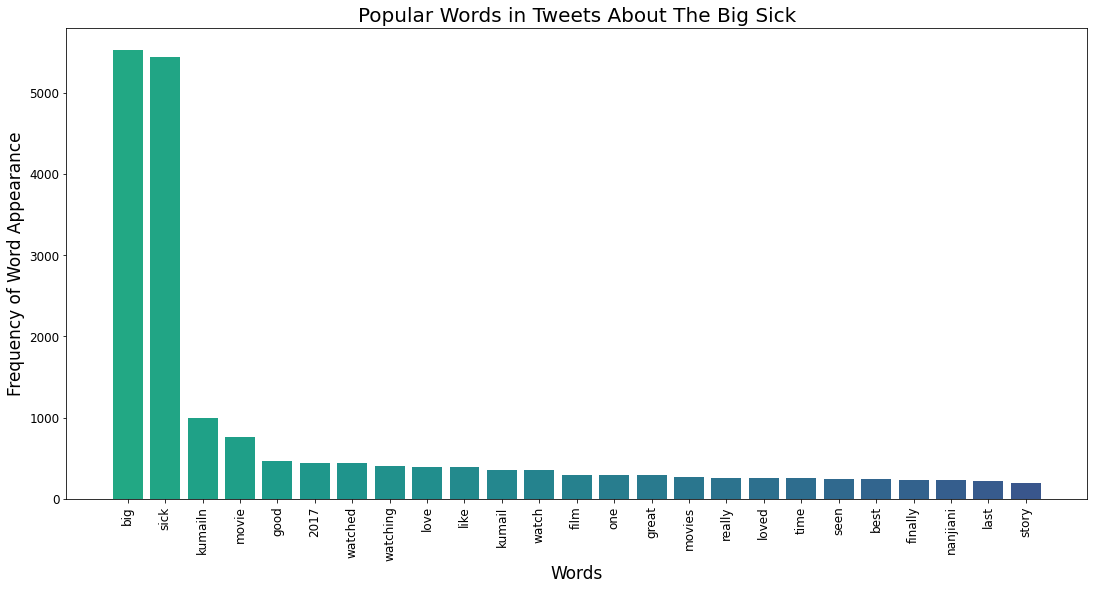

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(bigsick_words, bigsick_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word Appearance', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Tweets About The Big Sick', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barBigSick.png')

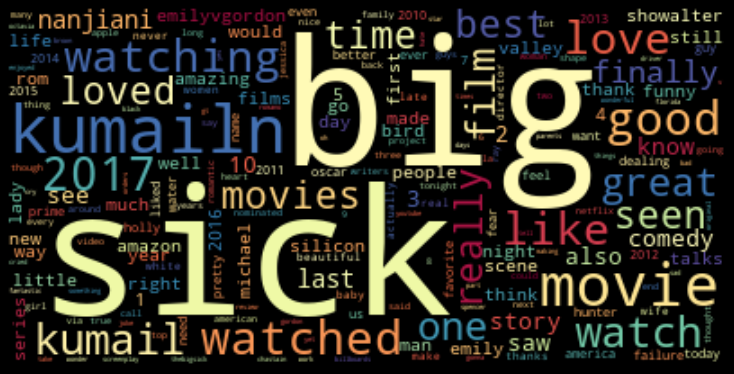

In [36]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image with matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudbigsick.png')

# Gone Girl

In [8]:
#collect tweets for Gone Girl movie
c = twint.Config()
c.Search = "Gone Girl"
c.Limit = 7500
c.Since = "2014-10-03" #release date October 3, 2014
c.Until = "2015-10-03"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [38]:
#Gone Girl dataframe
df_4 = twint.storage.panda.Tweets_df
df_4.head()

id     conversation_id    created_at                 date  \
0  649734536004280321  649734536004280321  1.443744e+12  2015-10-01 19:55:59   
1  649732798438215680  649732566065348609  1.443743e+12  2015-10-01 19:49:05   
2  649732770122461184  649729175708798977  1.443743e+12  2015-10-01 19:48:58   
3  649732566065348609  649732566065348609  1.443743e+12  2015-10-01 19:48:09   
4  649732240398786561  649732240398786561  1.443743e+12  2015-10-01 19:46:52   

  timezone place                                              tweet language  \
0    -0500        Gone Girl - Das perfekte Opfer nur noch 7,99 E...       de   
1    -0500        (#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...       en   
2    -0500                       @chlomeganda gone girl chloeeee :)       en   
3    -0500        (#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....       en   
4    -0500        Suspect indicted in Vallejo 'Gone Girl' kidnap...       en   

      hashtags cashtags  ...  geo source user_rt_id user_rt  retweet_id  \
0        [dvd]       []  ...                                              
1  [untildawn]       []  ...                                              
2           []       []  ...                                              
3  [untildawn]       []  ...                                              
4           []       []  ...                                              

  reply_to retweet_date translate trans_src  trans_dest  
0       []                                               
1       []                                               
2       []                                               
3       []                                               
4       []                                               

[5 rows x 38 columns]

In [39]:
# remove non-English tweets
df_4 = df_4[df_4['language'] == 'en']
df_4.shape

(5221, 38)

Uncomment and run the following cell to create df_4

In [40]:
# df_4.to_csv('df_4.csv')

Uncomment and run the following cell to read in df_4

In [25]:
# df_4 = pd.read_csv('df_4.csv')

In [23]:
#isolate tweets about the movie Gone Girl
tweets_GoneGirl = df_4['tweet'].values
tweets_GoneGirl

array(["(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALANGES. ENOUGH, CRY. ENOUGH.",
       '@chlomeganda gone girl chloeeee :)',
       "(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY. DON'T GONE GIRL HIS PHALANGES.",
       ..., 'Gone Girl👀',
       "California Couple in 'Gone Girl' Kidnapping Files Claim Against City  http://t.co/e2QRdQjxd8  http://t.co/wflxYzCg3X",
       "California Couple in 'Gone Girl' Kidnapping Files Claim Against City  http://t.co/4rfqydNGkh  http://t.co/Vj8Cu7kBqO"],
      dtype=object)

In [24]:
#tokenize tweets
tokenized_tweets = []
for tweet in tweets_GoneGirl:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #make each tweet lowercase to avoid duplicates
       
# print(tokenized_tweets)

In [26]:
#isolate each word in Gone Girl movie tweets except stop words
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [19]:
#freqDist - frequency of words within a text, in this case tweets about Gone Girl
fdist = FreqDist(tweets)

In [20]:
#top 25 words used when tweeting about Gone Girl
fdist.most_common(25)

[('girl', 5054),
 ('gone', 4778),
 ('movie', 636),
 ('watching', 568),
 ('gonegirl', 554),
 ('good', 303),
 ('like', 288),
 ('watch', 263),
 ('flynn', 232),
 ('gillian', 230),
 ('watched', 220),
 ('read', 211),
 ('book', 202),
 ('reading', 195),
 ('crazy', 194),
 ('train', 192),
 ('time', 185),
 ('love', 165),
 ('join', 159),
 ('film', 157),
 ('qwqgukxak4', 149),
 ('seen', 141),
 ('one', 139),
 ('28', 121),
 ('movies', 120)]

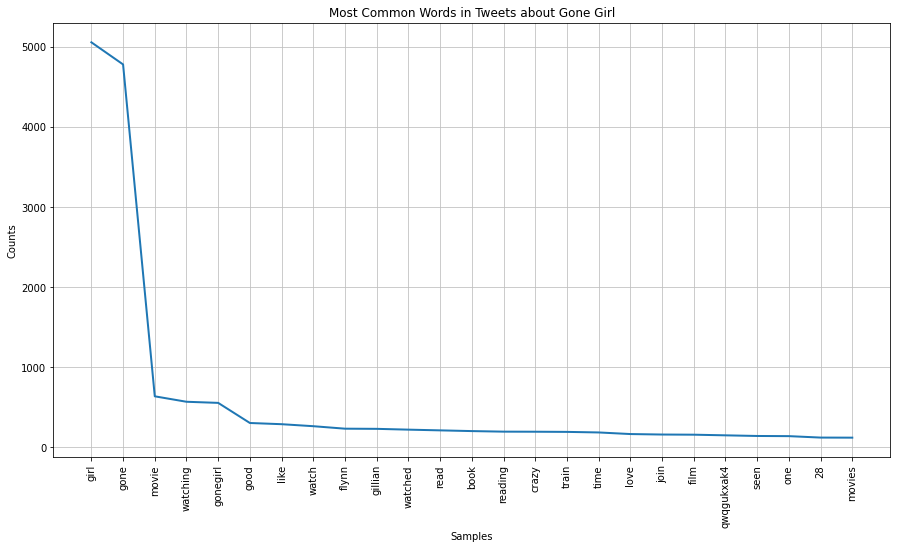

In [21]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets about Gone Girl")

In [22]:
# from fdist.most_common(25) seperate words and counts
gonegirl_words = [x[0] for x in fdist.most_common(25)]
print(gonegirl_words)
gonegirl_counts = [x[1] for x in fdist.most_common(25)]
print(gonegirl_counts)

['girl', 'gone', 'movie', 'watching', 'gonegirl', 'good', 'like', 'watch', 'flynn', 'gillian', 'watched', 'read', 'book', 'reading', 'crazy', 'train', 'time', 'love', 'join', 'film', 'qwqgukxak4', 'seen', 'one', '28', 'movies']
[5054, 4778, 636, 568, 554, 303, 288, 263, 232, 230, 220, 211, 202, 195, 194, 192, 185, 165, 159, 157, 149, 141, 139, 121, 120]


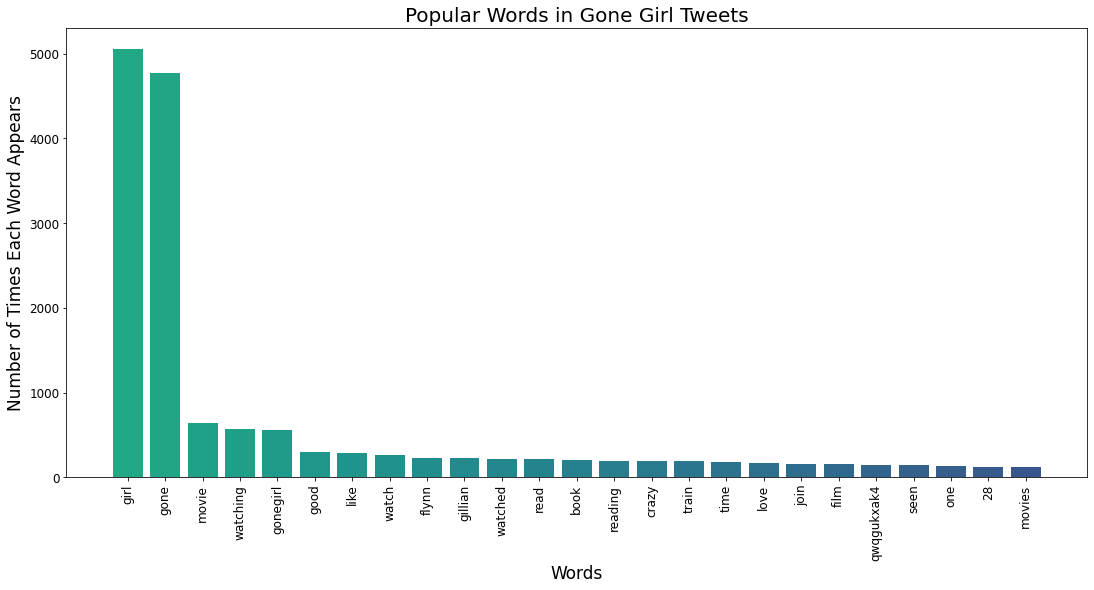

In [24]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(gonegirl_words, gonegirl_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Number of Times Each Word Appears', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Gone Girl Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/bargonegirl.png')

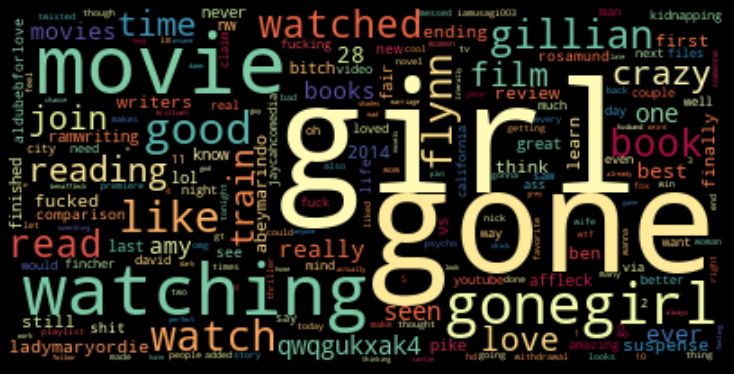

In [47]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display matplotlib image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudgonegirl.png')

# 17 Again 

In [9]:
#gather tweets from the movie 17 Again
c = twint.Config()
c.Search = "17 Again"
c.Limit = 6000
c.Since = "2009-04-14" #release date April 14, 2009
c.Until = "2010-04-14"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [49]:
#create dataframe for the movie 17 Again
df_5 = twint.storage.panda.Tweets_df
df_5.head()

id conversation_id    created_at                 date timezone  \
0  12072812563     12072812563  1.271116e+12  2010-04-12 19:44:15    -0500   
1  12072070037     12072070037  1.271115e+12  2010-04-12 19:28:20    -0500   
2  12072044784     12071772509  1.271115e+12  2010-04-12 19:27:47    -0500   
3  12071939860     12071939860  1.271115e+12  2010-04-12 19:25:32    -0500   
4  12071936881     12071936881  1.271115e+12  2010-04-12 19:25:28    -0500   

  place                                              tweet language hashtags  \
0         http://bit.ly/bqye6j where can i get a dress ...       en       []   
1               watching 17 Again. :) i missed this movie.       en       []   
2        @conallen haha not surprising. "17 Again" seem...       en       []   
3        @tjlyricz just gonna watch 17 again, and you g...       en       []   
4        Encontré un remedio infalible para superar mi ...       es       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []  ...                                                  []   
1       []  ...                                                  []   
2       []  ...                                                  []   
3       []  ...                                                  []   
4       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [50]:
# remove non-English tweets
df_5 = df_5[df_5['language'] == 'en']

In [51]:
#shape after non-English tweets are removed
df_5.shape

(5173, 38)

Uncomment and run the next cell to save df_5

In [52]:
# df_5.to_csv('df_5.csv')

Uncomment and run the next cell to read in df_5

In [27]:
# df_5 = pd.read_csv('df_5.csv')

In [28]:
#isolate tweets
tweets_17 = df_5['tweet'].values
tweets_17

array([' http://bit.ly/bqye6j where can i get a dress similar to the zac posen dress vanessa hudgens wore to the 17 again premiere?   Zac Posen',
       'watching 17 Again. :) i missed this movie.',
       '@conallen haha not surprising. "17 Again" seemed to be the trigger for quite a few converts. He\'s a charmer.',
       ...,
       "I'm watching Signs because I'm not allowing myself to watch 17 Again, again. Mistake? Possibly.",
       '#nowplaying 17 again (i hella like this movie)',
       "@Leopardjedi It's my way of trying to be 17 again, hahahaha! Mid life (20s) crisis!"],
      dtype=object)

In [29]:
#tokenize isolated tweets
tokenized_tweets = []
for tweet in tweets_17:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #make tweets lowercase to avoid duplicates
        
# print(tokenized_tweets)

In [30]:
#isolate each word
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list: #don't include stop words in list
            tweets.append(word)  

# tweets

In [29]:
#frequency of words within 17 Again
fdist = FreqDist(tweets)

In [30]:
fdist.most_common(25)

[('17', 5096),
 ('watching', 1290),
 ('movie', 903),
 ('zac', 842),
 ('efron', 734),
 ('watch', 508),
 ('like', 444),
 ('love', 376),
 ('lol', 373),
 ('zoeblais', 287),
 ('good', 265),
 ('17again', 253),
 ('watched', 250),
 ('3', 217),
 ('watchin', 190),
 ('bit', 176),
 ('feel', 160),
 ('haha', 149),
 ('4', 148),
 ('time', 144),
 ('im', 142),
 ('one', 139),
 ('think', 138),
 ('funny', 127),
 ('really', 124)]

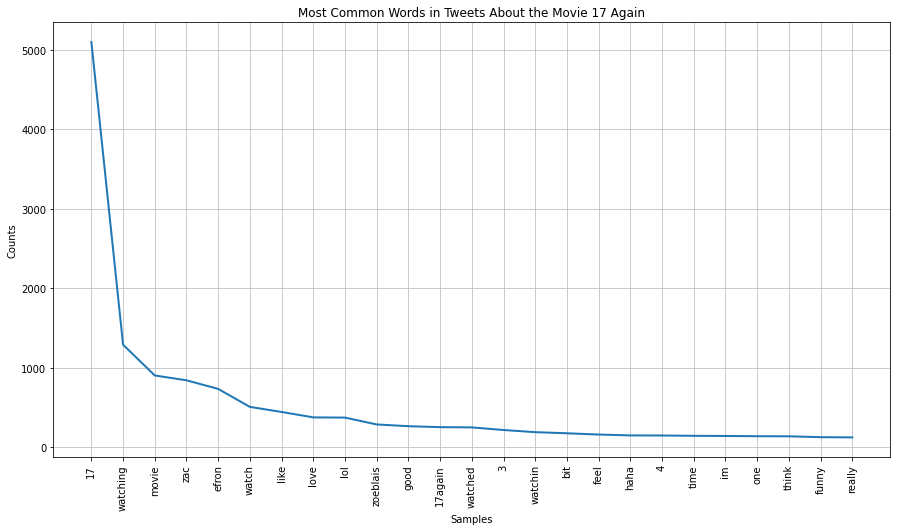

In [31]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie 17 Again")

In [32]:
# from fdist.most_common(25) seperate words and counts
again17_words = [x[0] for x in fdist.most_common(25)]
again17_counts = [x[1] for x in fdist.most_common(25)]

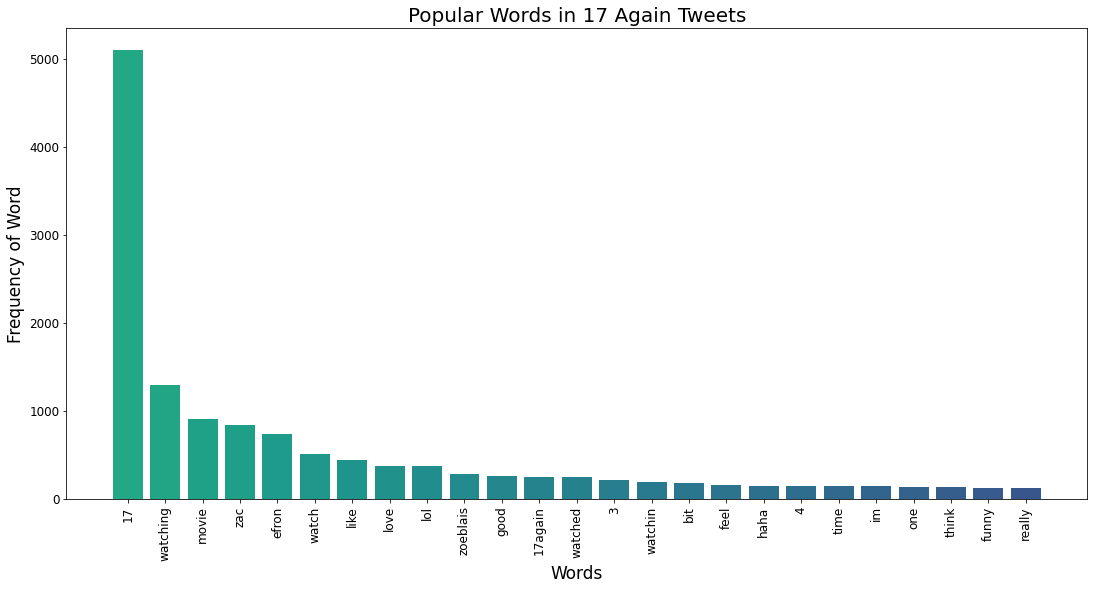

In [33]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(again17_words, again17_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in 17 Again Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/bar17again.png')

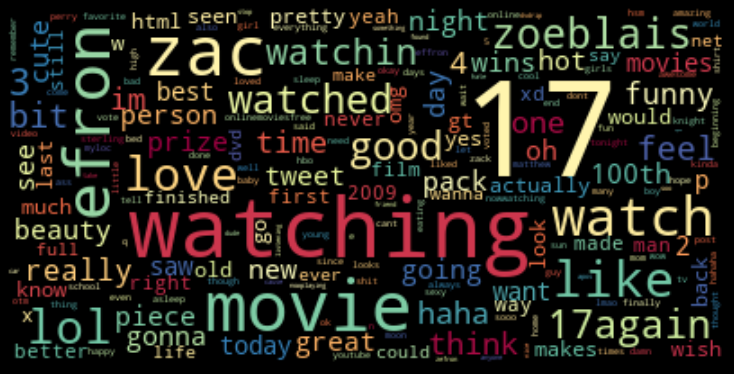

In [59]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# matplotlib visual:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloud17again.png')

# Jennifer's Body

In [10]:
#gather tweets from the movie Jennifer's body
c = twint.Config()
c.Search = "Jennifer's Body"
c.Limit = 6000
c.Since = "2009-09-18" #release date September 18, 2009
c.Until = "2010-09-18"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [61]:
#create dataframe for the movie Jennifer's Body
df_6 = twint.storage.panda.Tweets_df
df_6.head()

id conversation_id    created_at                 date timezone  \
0  24709152388     24709152388  1.284681e+12  2010-09-16 19:57:28    -0500   
1  24708901813     24708901813  1.284681e+12  2010-09-16 19:53:59    -0500   
2  24703649087     24703649087  1.284677e+12  2010-09-16 18:40:07    -0500   
3  24698404857     24698404857  1.284672e+12  2010-09-16 17:22:37    -0500   
4  24696864022     24696864022  1.284671e+12  2010-09-16 16:59:37    -0500   

  place                                              tweet language hashtags  \
0        I'll wear my Jennifer's Body shirt and red and...       en       []   
1        tô procurando 'Jennifer's body', vi 'new persp...       pt       []   
2        Watching Jennifer's Body with Erin & Jess, the...       en       []   
3        Ok I just threw up some black ropey stuff like...       en       []   
4        The Jennifer's Body soundtrack is so good. If ...       en       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []  ...                                                  []   
1       []  ...                                                  []   
2       []  ...                                                  []   
3       []  ...                                                  []   
4       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [62]:
#only use English tweets
df_6 = df_6[df_6['language'] == 'en']

In [63]:
#resulting dataframe after non-English tweets are dropped
df_6.shape

(5201, 38)

Uncomment and run next cell to save df_6

In [64]:
# df_6.to_csv('df_6.csv')

Uncomment and run the next cell to read in df_6

In [32]:
# df_6 = pd.read_csv('df_6.csv')

In [33]:
#isolate tweets
tweets_Jennifer = df_6['tweet'].values
tweets_Jennifer

array(["I'll wear my Jennifer's Body shirt and red and black scarf for tomorrow. (: they're red!",
       "Watching Jennifer's Body with Erin & Jess, then making breakfast for dinner & watching Project Runway!!!!",
       "Ok I just threw up some black ropey stuff like Jennifer's body styles. WTF is wrong with me?",
       ...,
       'What\'s the point of this "Jennifer\'s Body" movie ?? How did that demon shit get in her ??',
       "pad thai & jennifer's body with @kaseymarcum you're totally lime green jello.",
       "I liked a YouTube video -- Megan Fox talks Jennifer's Body and Amanda Seyfried  http://youtu.be/9qpWtbcPeow?a"],
      dtype=object)

In [34]:
#tokenize isolated tweets
tokenized_tweets = []
for tweet in tweets_Jennifer:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #lower case each tweet to avoid duplicates
    
# print(tokenized_tweets)

In [35]:
#isolate each word in tweets
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [38]:
#frequency of words within Jennifer's Body
fdist = FreqDist(tweets)

In [39]:
fdist.most_common(25)

[('body', 5307),
 ('jennifer', 5289),
 ('watching', 1280),
 ('movie', 1077),
 ('fox', 676),
 ('megan', 667),
 ('watch', 451),
 ('lol', 303),
 ('like', 283),
 ('bit', 275),
 ('watched', 264),
 ('good', 231),
 ('love', 222),
 ('seen', 186),
 ('time', 181),
 ('ever', 161),
 ('watchin', 159),
 ('horror', 142),
 ('3', 138),
 ('really', 137),
 ('bad', 134),
 ('see', 131),
 ('shit', 130),
 ('movies', 125),
 ('nowwatching', 118)]

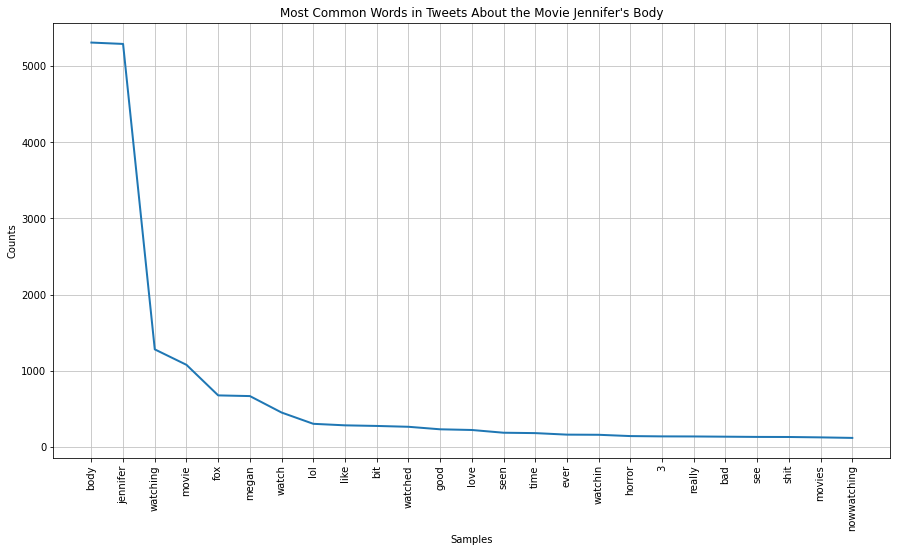

In [40]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Jennifer's Body")

In [41]:
# from fdist.most_common(25) seperate words and counts
jennifersbody_words = [x[0] for x in fdist.most_common(25)]
jennifersbody_counts = [x[1] for x in fdist.most_common(25)]

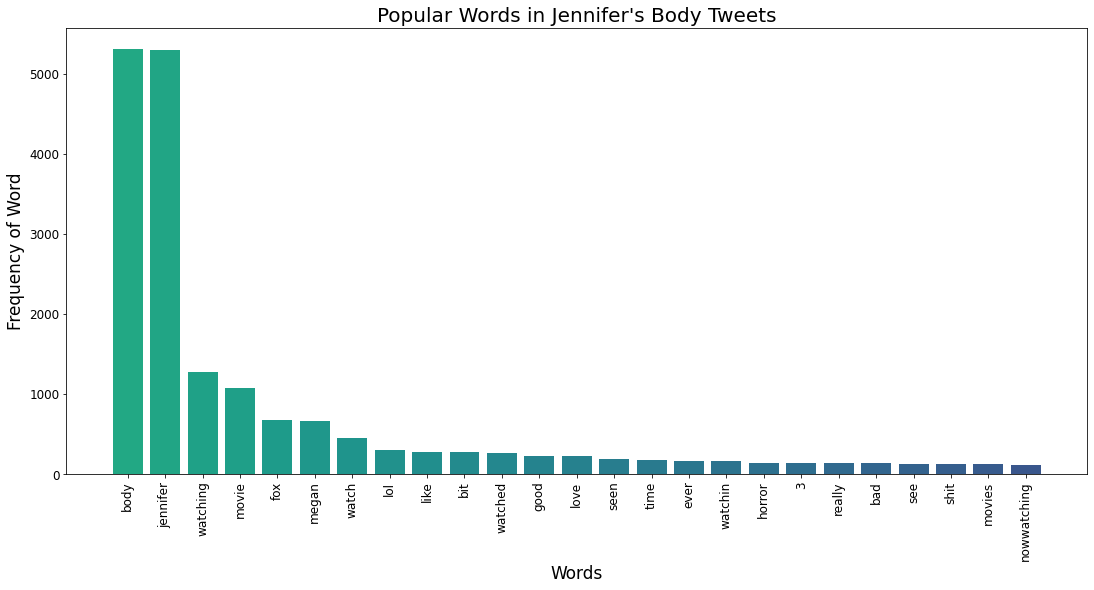

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(jennifersbody_words, jennifersbody_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Popular Words in Jennifer's Body Tweets", fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barjennifersbody.png')

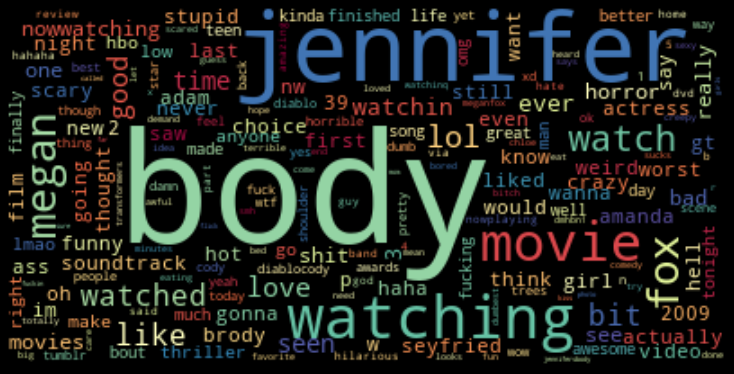

In [73]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

#use matplotlib to generate an image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudjennifersbody.png')

# The Shape of Water

In [11]:
#gather tweets from the movie The Shape of Water
c = twint.Config()
c.Search = "The Shape of Water"
c.Limit = 6000
c.Since = "2017-08-31" #released in America August 31, 2017
c.Until = "2018-08-31"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [113]:
#create dataframe for tweets about The Shape of Water
df_7 = twint.storage.panda.Tweets_df
df_7.head()

id      conversation_id    created_at  \
0  1034953714556006400  1034953714556006400  1.535587e+12   
1  1034949574010519552  1034949574010519552  1.535586e+12   
2  1034948712903176195  1034948712903176195  1.535586e+12   
3  1034948484460412928  1034909323510599685  1.535586e+12   
4  1034948099045646336  1034948099045646336  1.535586e+12   

                  date timezone place  \
0  2018-08-29 19:59:28    -0500         
1  2018-08-29 19:43:01    -0500         
2  2018-08-29 19:39:36    -0500         
3  2018-08-29 19:38:41    -0500         
4  2018-08-29 19:37:09    -0500         

                                               tweet language hashtags  \
0  Fab and I watching shape of water together and...       en       []   
1  📷 hellohousemouse: the shape of water  model: ...       en       []   
2  "The Shape of Water is like alien Amelie, but ...       en       []   
3  @CharlieWSwain That couple in “The Shape Of Wa...       en       []   
4  More power to him. Sure beats the spew,  prais...       en       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []  ...                                                  []   
1       []  ...                                                  []   
2       []  ...                                                  []   
3       []  ...                                                  []   
4       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [114]:
# remove non-English tweets and observe remaining number of tweets
df_7 = df_7[df_7['language'] == 'en']
df_7.shape

(5133, 38)

Uncomment and run the next cell to save df_7 to a csv

In [115]:
# df_7.to_csv('df_7.csv')

Uncomment and run the next cell to read in df_7

In [37]:
# df_7 = pd.read_csv('df_7.csv')

In [38]:
#isolate tweets
tweets_Water = df_7['tweet'].values
tweets_Water

array(['Fab and I watching shape of water together and hating on the headass and his mustard fingers is the highlight of my day',
       '📷 hellohousemouse: the shape of water\xa0 model: @avery-vulpes rope+photo by me 🐭 Beautiful  https://t.co/pqZ7RZyAYv',
       '"The Shape of Water is like alien Amelie, but Amelie is better" - Me, still bitter that Get Out didn\'t win the Oscar',
       ..., 'The shape of water for development  https://t.co/1hTuE7xPL9',
       'Comic-Con 2018: NECA’s Show Floor Display Includes New GREMLINS, Chucky &amp; Tiffany, THE SHAPE OF WATER Figure, and More!  https://t.co/MIUxpdX6Mi  https://t.co/MV8NIiRqnQ',
       "I'm up past my bedtime watching The Shape of Water again."],
      dtype=object)

In [39]:
#tokenize isolated tweets
tokenized_tweets = []
for tweet in tweets_Water:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #lowercase tweets to avoid duplicates

In [40]:
#isolate each word in The Shape of Water movie tweets
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list: #exlude words in stop list
            tweets.append(word)  

# tweets

In [47]:
#frequency of words within The Shape of Water
fdist = FreqDist(tweets)

In [48]:
fdist.most_common(25)

[('water', 5276),
 ('shape', 5240),
 ('movie', 567),
 ('film', 453),
 ('like', 424),
 ('2017', 383),
 ('best', 358),
 ('del', 340),
 ('toro', 328),
 ('love', 328),
 ('movies', 303),
 ('fish', 298),
 ('guillermo', 295),
 ('one', 264),
 ('watching', 263),
 ('watched', 240),
 ('watch', 225),
 ('last', 219),
 ('really', 216),
 ('good', 216),
 ('2', 214),
 ('oscar', 211),
 ('picture', 206),
 ('nanotubes', 198),
 ('think', 196)]

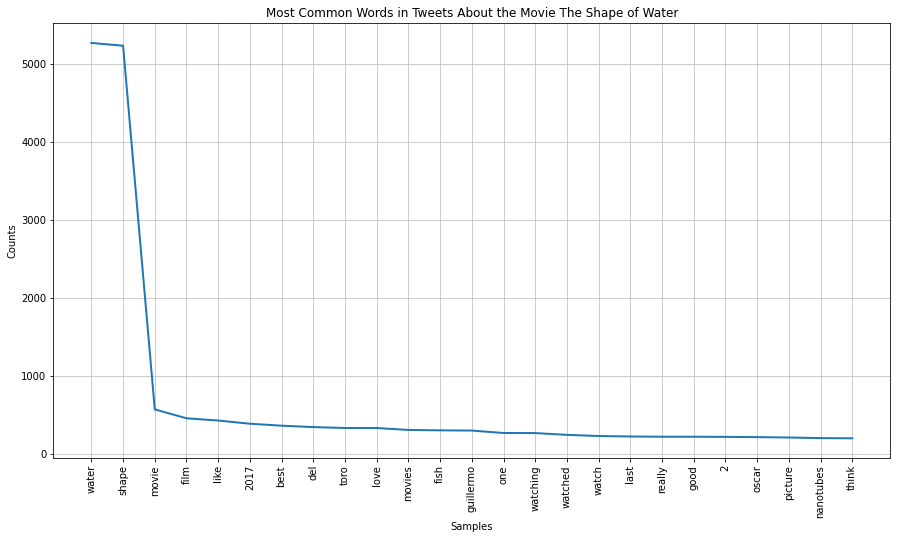

In [49]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie The Shape of Water")

In [50]:
# from fdist.most_common(25) seperate words and counts
shapeofwater_words = [x[0] for x in fdist.most_common(25)]
shapeofwater_counts = [x[1] for x in fdist.most_common(25)]

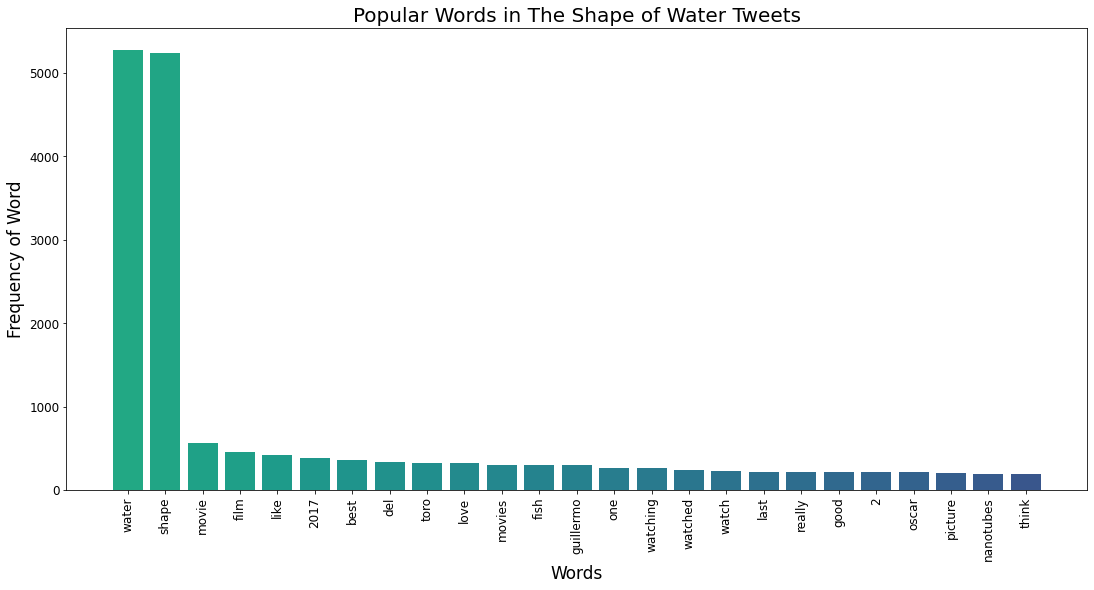

In [51]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(shapeofwater_words, shapeofwater_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in The Shape of Water Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barshapeofwater.png')

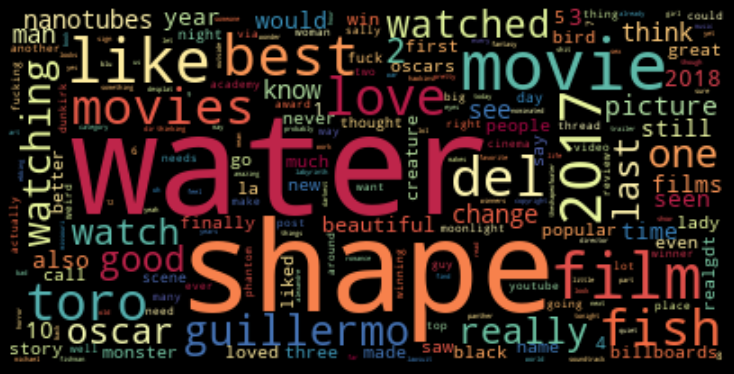

In [122]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# use matplotlib to create image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudshapeofwater.png')

# The Big Short

In [12]:
#gather tweets from the movie The Big Short
c = twint.Config()
c.Search = "The Big Short"
c.Limit = 6500
c.Since = "2015-12-11" #release date: December 11, 2015
c.Until = "2016-12-11"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [127]:
#create dataframe for The Big Short movie tweets
df_8 = twint.storage.panda.Tweets_df
df_8.head()

id     conversation_id    created_at                 date  \
0  807373756368875520  807373756368875520  1.481328e+12  2016-12-09 18:57:58   
1  807373752367390720  807373752367390720  1.481328e+12  2016-12-09 18:57:57   
2  807373279359094786  807373279359094786  1.481328e+12  2016-12-09 18:56:04   
3  807371439687036928  807368716904230920  1.481327e+12  2016-12-09 18:48:46   
4  807370525689446400  807370525689446400  1.481327e+12  2016-12-09 18:45:08   

  timezone place                                              tweet language  \
0    -0500        Just watched The Big Short. Fascinating film, ...       en   
1    -0500        Roger Ailes-Megyn Kelly Harassment Film in the...       en   
2    -0500        The Big Short: is the next financial crisis on...       en   
3    -0500        @BreitbartNews will it be call the Big Short I...       en   
4    -0500        ¿Cómo saber lo que pasa realmente en tu empres...       es   

        hashtags cashtags  ...  geo source user_rt_id user_rt  retweet_id  \
0  [thebigshort]       []  ...                                              
1             []       []  ...                                              
2             []       []  ...                                              
3             []       []  ...                                              
4      [aprende]       []  ...                                              

                                            reply_to retweet_date translate  \
0                                                 []                          
1                                                 []                          
2                                                 []                          
3  [{'screen_name': 'BreitbartNews', 'name': 'Bre...                          
4                                                 []                          

  trans_src  trans_dest  
0                        
1                        
2                        
3                        
4                        

[5 rows x 38 columns]

In [128]:
#drop non-English tweets and observe the remaining amount of tweets
df_8 = df_8[df_8['language'] == 'en']
df_8.shape

(5244, 38)

Uncomment and run the next cell to save the df_8 dataframe

In [129]:
# df_8.to_csv('df_8.csv')

Uncomment and run the next cell to read in df_8

In [41]:
# df_8 = pd.read_csv('df_8.csv')

In [42]:
#isolate tweets
tweets_BigShort = df_8['tweet'].values

In [43]:
#tokenize the isolated tweets
tokenized_tweets = []
for tweet in tweets_BigShort:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #lowercase all tweets

In [44]:
#isolate individual words
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list: #exclude stop words
            tweets.append(word)  

# tweets

In [56]:
#frequency of words within The Big Short
fdist = FreqDist(tweets)

In [57]:
fdist.most_common(25)

[('big', 5367),
 ('short', 5309),
 ('movie', 821),
 ('financial', 566),
 ('next', 452),
 ('crisis', 433),
 ('watch', 397),
 ('way', 381),
 ('watching', 346),
 ('film', 337),
 ('watched', 312),
 ('michael', 299),
 ('lewis', 269),
 ('via', 263),
 ('new', 262),
 ('like', 245),
 ('inside', 240),
 ('good', 235),
 ('doomsday', 226),
 ('machine', 225),
 ('author', 222),
 ('book', 213),
 ('truth', 205),
 ('netflix', 195),
 ('crash', 185)]

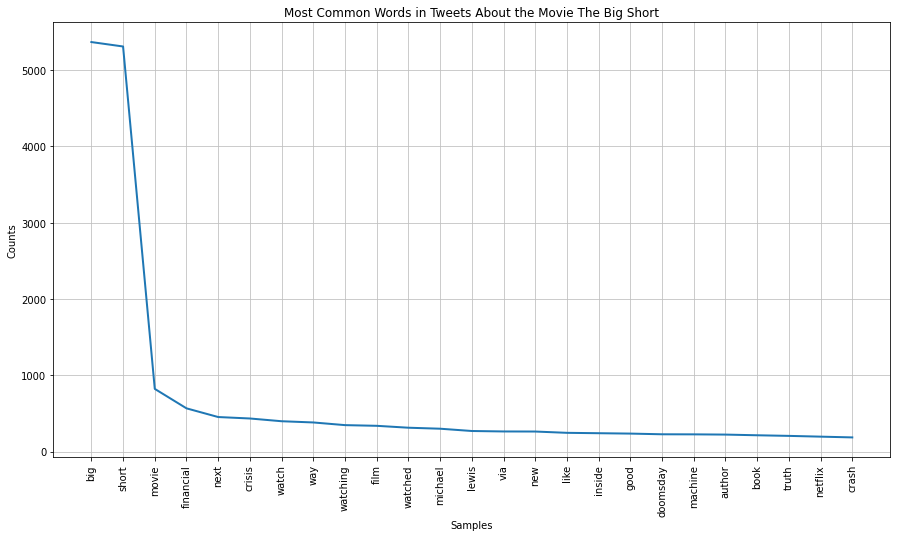

In [58]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie The Big Short")

In [59]:
# from fdist.most_common(25) seperate words and counts
bigshort_words = [x[0] for x in fdist.most_common(25)]
bigshort_counts = [x[1] for x in fdist.most_common(25)]

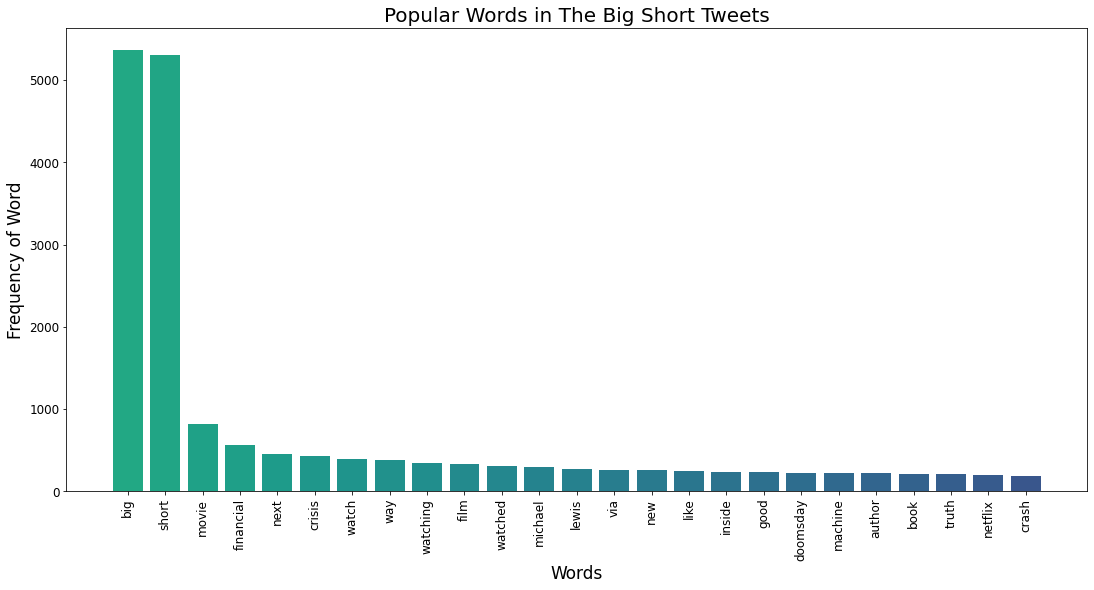

In [60]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(bigshort_words, bigshort_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in The Big Short Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barbigshort.png')

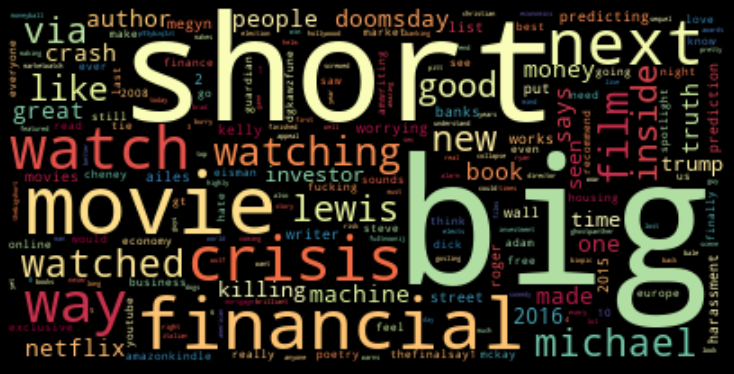

In [136]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# generated image with matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudbigshort.png')

# Cloudy with a Chance of Meatballs

In [13]:
#gather tweets from the movie Cloudy with a Chance of Meatballs
c = twint.Config()
c.Search = "Cloudy with a Chance of Meatballs"
c.Limit = 5500
c.Since = "2009-09-18" #release date September 18, 2009
c.Until = "2010-09-18"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [143]:
#create dataframe for tweets about Cloudy with a Chance of Meatballs
df_9 = twint.storage.panda.Tweets_df
df_9.head()

id conversation_id    created_at                 date timezone  \
0  24708919966     24708919966  1.284681e+12  2010-09-16 19:54:13    -0500   
1  24707565423     24707565423  1.284680e+12  2010-09-16 19:35:21    -0500   
2  24698704201     24698704201  1.284672e+12  2010-09-16 17:27:08    -0500   
3  24698154027     24698154027  1.284672e+12  2010-09-16 17:18:49    -0500   
4  24698052801     24696504623  1.284672e+12  2010-09-16 17:17:17    -0500   

  place                                              tweet language hashtags  \
0                     Cloudy with a chance of meatballs :)       en       []   
1        @redshiftlove cloudy with a chance of meatball...       en       []   
2        I think it is officially time for me to addres...       en       []   
3        I got Cloudy with a Chance of Meatballs on Blu...       en       []   
4        @Ollievoso like in Cloudy with a Chance of Mea...       en       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []  ...                                                  []   
1       []  ...                                                  []   
2       []  ...                                                  []   
3       []  ...                                                  []   
4       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [144]:
#only use english tweets and observe resulting amount of tweets
df_9 = df_9[df_9['language'] == 'en']
df_9.shape

(5377, 38)

Uncomment and run the next cell to save df_9

In [145]:
# df_9.to_csv('df_9.csv')

Uncomment and run the following cell to read in df_9

In [46]:
# df_9 = pd.read_csv('df_9.csv')

In [47]:
#isolate tweets
tweets_Cloudy = df_9['tweet'].values

In [48]:
#tokenize isolate tweets
tokenized_tweets = []
for tweet in tweets_Cloudy:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #lowercase tweets

In [49]:
#isolate individual words
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list: #exclude words in stop list
            tweets.append(word)  

# tweets

In [65]:
#frequency of words within Cloudy with a Chance of Meatballs
fdist = FreqDist(tweets)

In [66]:
#25 most common words in Cloudy with a Chance of Meatballs
fdist.most_common(25)

[('cloudy', 5478),
 ('chance', 5450),
 ('meatballs', 5445),
 ('watching', 1123),
 ('movie', 811),
 ('bit', 384),
 ('watch', 328),
 ('dvd', 286),
 ('lol', 258),
 ('good', 223),
 ('watched', 201),
 ('love', 197),
 ('park', 191),
 ('tonight', 173),
 ('time', 171),
 ('night', 166),
 ('3', 164),
 ('p', 159),
 ('like', 158),
 ('free', 150),
 ('3d', 147),
 ('movies', 145),
 ('great', 140),
 ('funny', 140),
 ('ray', 131)]

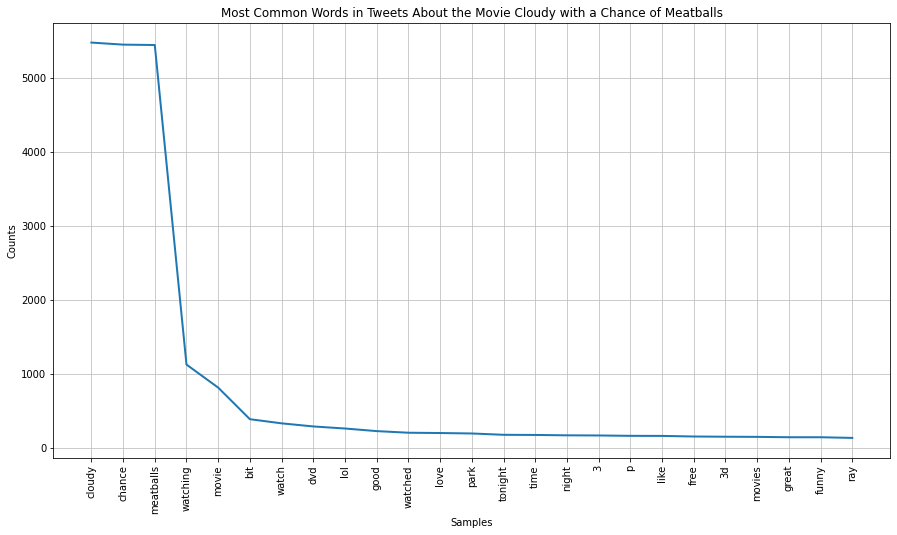

In [67]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Cloudy with a Chance of Meatballs")

In [68]:
# from fdist.most_common(25) seperate words and counts
cloudy_words = [x[0] for x in fdist.most_common(25)]
cloudy_counts = [x[1] for x in fdist.most_common(25)]

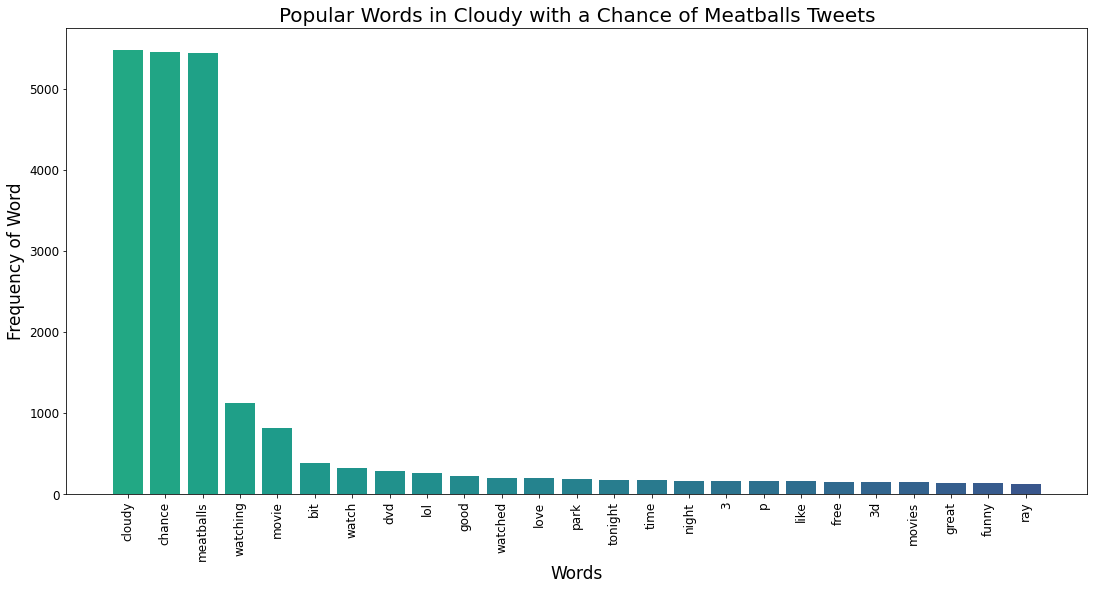

In [69]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(cloudy_words, cloudy_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Cloudy with a Chance of Meatballs Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barcloudymeatballs.png')

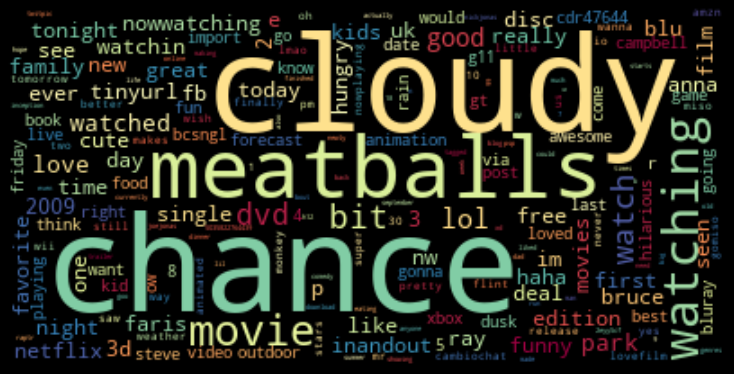

In [152]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# matplotlib image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudmeatballs.png')

# WallE

In [14]:
#gather tweets from the movie Wall-E
c = twint.Config()
c.Search = "Wall-E"
c.Limit = 6000
c.Since = "2008-06-27" #release date June 27, 2008
c.Until = "2009-06-27"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [154]:
#convert to dataframe
df_10 = twint.storage.panda.Tweets_df
df_10.head()

id conversation_id    created_at                 date timezone  \
0  2335385400      2335385400  1.245974e+12  2009-06-25 19:54:38    -0500   
1  2335057043      2335057043  1.245973e+12  2009-06-25 19:37:09    -0500   
2  2334867645      2334867645  1.245972e+12  2009-06-25 19:27:14    -0500   
3  2334778357      2334778357  1.245972e+12  2009-06-25 19:22:26    -0500   
4  2334748248      2334748248  1.245972e+12  2009-06-25 19:20:48    -0500   

  place                                              tweet language hashtags  \
0        A dormir despues de haber visto Wall-E con una...       es       []   
1        Breaking News: Wall-E's battier has run out. H...       en       []   
2        I think my mind is too complex for WALL-E, @wu...       en       []   
3             Bout to watch Wall-e the best movie ever!!!!       en       []   
4           Finally home full of micky d's n watchn wall-e       en       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []  ...                                                  []   
1       []  ...                                                  []   
2       []  ...                                                  []   
3       []  ...                                                  []   
4       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [155]:
# remove non-English tweets
df_10 = df_10[df_10['language'] == 'en']
df_10.shape

(5367, 38)

Uncomment and run the following cell to save df_10 csv

In [156]:
# df_10.to_csv('df_10.csv')

Uncomment and run the following cell to read in df_10

In [50]:
# df_10 = pd.read_csv('df_10.csv')

In [51]:
#tokenize isolated tweets
tokenized_tweets = []
for tweet in df_10['tweet'].values:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower()))

In [52]:
#isolate individual words
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [73]:
#frequency of words within Wall-E
fdist = FreqDist(tweets)

In [74]:
fdist.most_common(25)

[('e', 5585),
 ('wall', 5567),
 ('watching', 1041),
 ('movie', 672),
 ('watch', 406),
 ('good', 378),
 ('love', 359),
 ('like', 341),
 ('pixar', 329),
 ('time', 310),
 ('bit', 299),
 ('watched', 282),
 ('cute', 260),
 ('saw', 225),
 ('better', 208),
 ('see', 206),
 ('tinyurl', 203),
 ('seen', 201),
 ('great', 182),
 ('3', 181),
 ('one', 180),
 ('movies', 175),
 ('still', 175),
 ('think', 166),
 ('best', 165)]

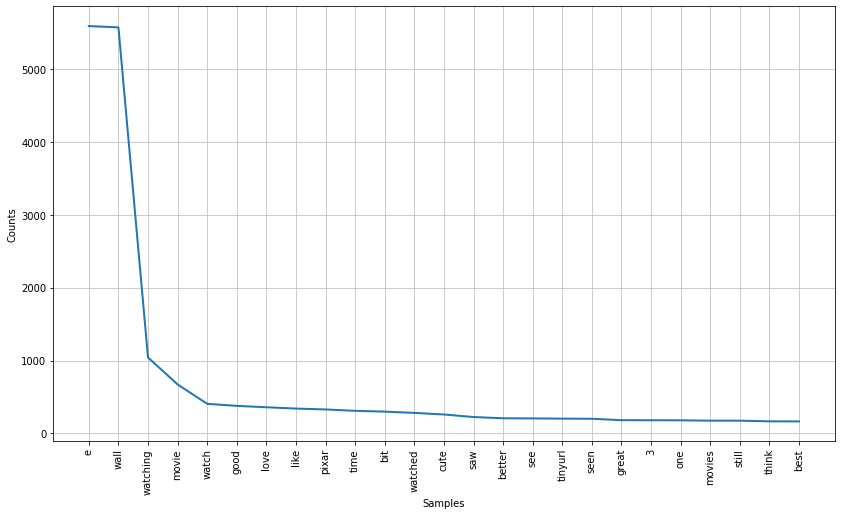

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [162]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Wall-E")

In [75]:
# from fdist.most_common(25) seperate words and counts
walle_words = [x[0] for x in fdist.most_common(25)]
walle_counts = [x[1] for x in fdist.most_common(25)]

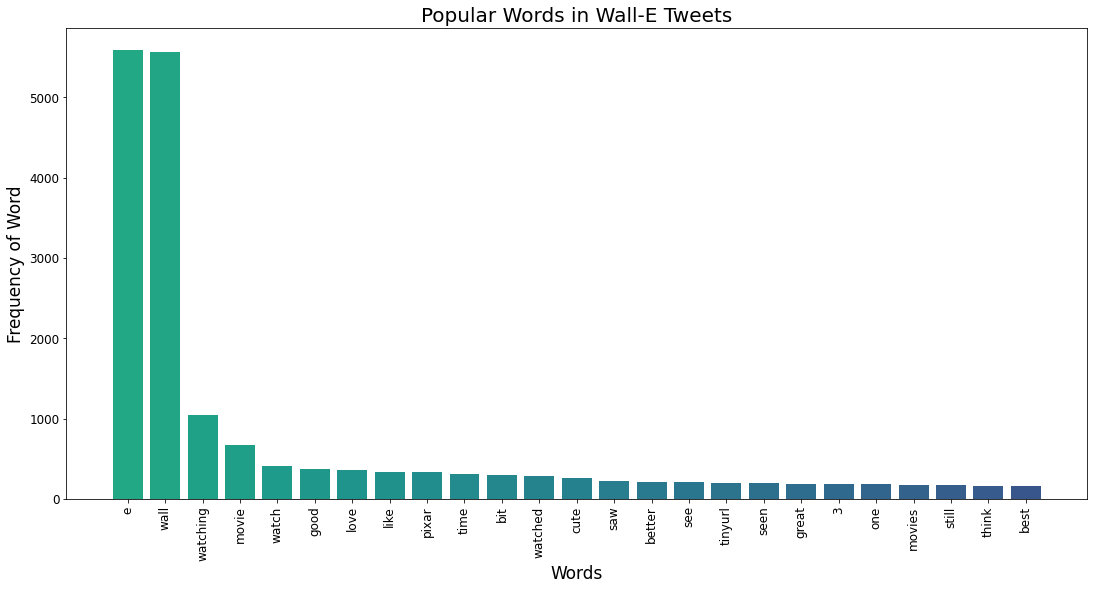

In [76]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(walle_words, walle_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Wall-E Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barwalle.png')

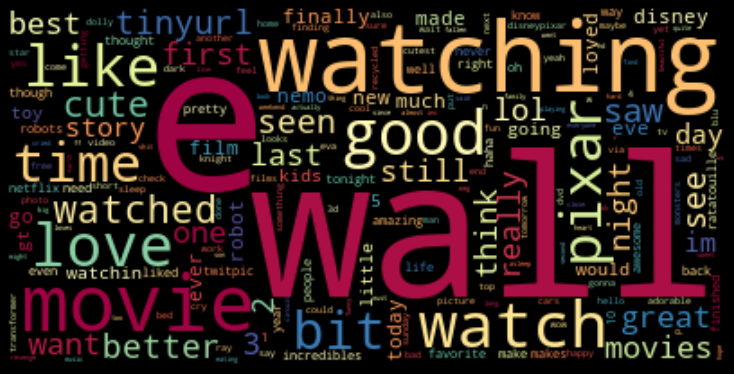

In [163]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Generate image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudwalle.png')

# Slumdog Millionaire

In [15]:
#gather tweets from the movie Slumdog Millionaire
c = twint.Config()
c.Search = "Slumdog Millionaire"
c.Limit = 6000
c.Since = "2008-11-12" #release date November 12, 2008
c.Until = "2009-11-12"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [165]:
df_11 = twint.storage.panda.Tweets_df
df_11.head()

id conversation_id    created_at                 date timezone  \
0  5603611789      5603611789  1.257897e+12  2009-11-10 18:53:04    -0500   
1  5603007478      5602855359  1.257896e+12  2009-11-10 18:29:55    -0500   
2  5602137272      5602137272  1.257894e+12  2009-11-10 17:56:36    -0500   
3  5601420853      5601420853  1.257892e+12  2009-11-10 17:29:05    -0500   
4  5601188041      5601188041  1.257892e+12  2009-11-10 17:20:07    -0500   

  place                                              tweet language hashtags  \
0        confirmado: precious es mi (la?) slumdog milli...       es       []   
1        @krael52 because shravani and keethi want to p...       en       []   
2        Outside with sam jefferson and my big sis... c...       en       []   
3        @1heavenlyflower: OMG! my favorite movie.........       en       []   
4        Crapola News!, Slumdog Millionaire grabs 5 nod...       en       []   

  cashtags  ...  geo source user_rt_id user_rt  retweet_id reply_to  \
0       []  ...                                                  []   
1       []  ...                                                  []   
2       []  ...                                                  []   
3       []  ...                                                  []   
4       []  ...                                                  []   

  retweet_date translate trans_src  trans_dest  
0                                               
1                                               
2                                               
3                                               
4                                               

[5 rows x 38 columns]

In [166]:
# remove non-English tweets and observe shape
df_11 = df_11[df_11['language'] == 'en']
df_11.shape

(5285, 38)

Uncomment and run the following cell to save df_11 to a csv

In [167]:
# df_11.to_csv('df_11.csv')

Uncomment and run the next cell to read in df_11

In [57]:
# df_11 = pd.read_csv('df_11.csv')

In [54]:
#isolate Slumdog Millionaire tweets
tweets_SM = df_11['tweet'].values

In [55]:
#tokenize each tweet
tokenized_tweets = []
for tweet in tweets_SM:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower()))

In [56]:
#isolate individual words
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [81]:
#frequency of words within Slumdog Millionaire
fdist = FreqDist(tweets)

In [82]:
fdist.most_common(25)

[('slumdog', 5299),
 ('millionaire', 5173),
 ('movie', 1201),
 ('watching', 1126),
 ('bit', 882),
 ('good', 537),
 ('watch', 440),
 ('kids', 383),
 ('time', 377),
 ('watched', 339),
 ('school', 307),
 ('love', 297),
 ('great', 275),
 ('new', 269),
 ('like', 267),
 ('finally', 234),
 ('watchin', 231),
 ('lol', 223),
 ('lie', 199),
 ('marketing', 198),
 ('kim', 195),
 ('klaver', 195),
 ('stars', 191),
 ('film', 189),
 ('see', 182)]

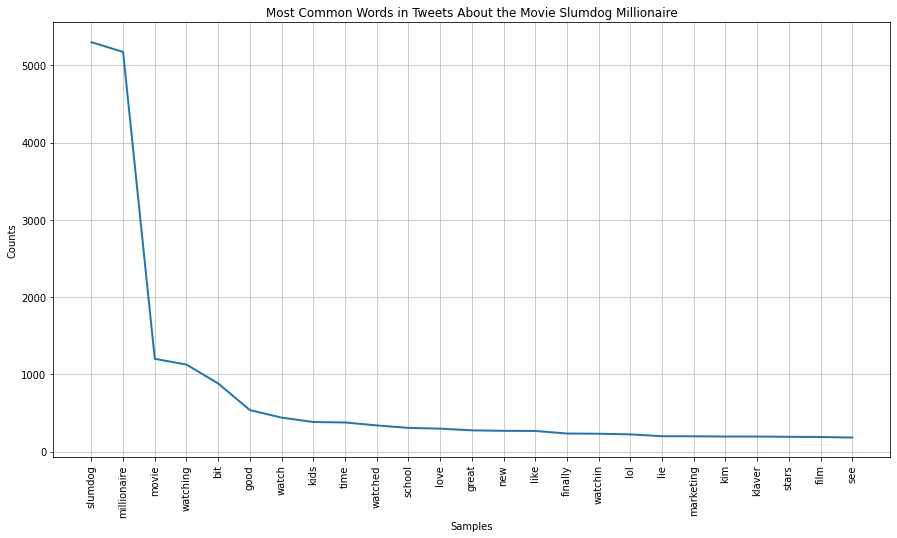

In [83]:
#plot 25 most tweeted words about Slumdog Millionaire
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Slumdog Millionaire")

In [84]:
# from fdist.most_common(25) seperate words and counts
slumdogmillionaire_words = [x[0] for x in fdist.most_common(25)]
slumdogmillionaire_counts = [x[1] for x in fdist.most_common(25)]

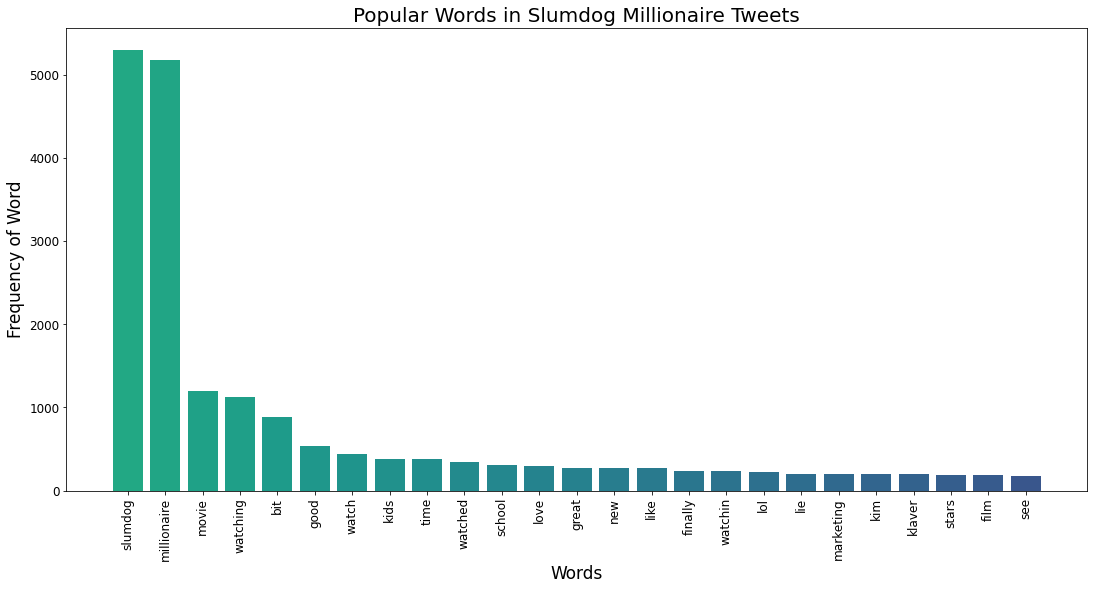

In [86]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(slumdogmillionaire_words, slumdogmillionaire_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Slumdog Millionaire Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barslumdogmillionaire.png')

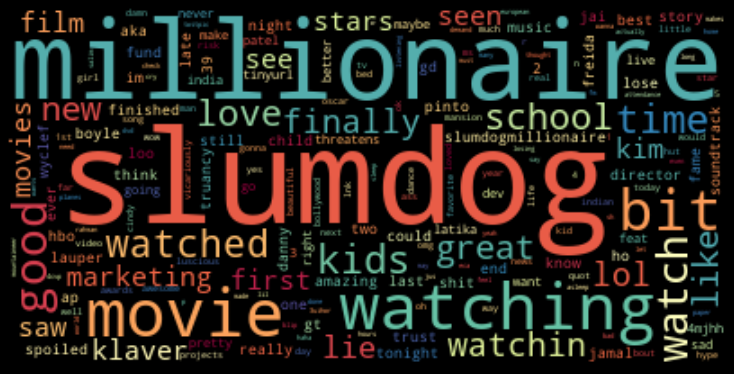

In [174]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudslumdog.png')

# Bird Box

In [16]:
#gather tweets from the movie Bird Box
c = twint.Config()
c.Search = "Bird Box"
c.Limit = 7000
c.Since = "2018-12-14" #released December 14, 2018
c.Until = "2019-12-14"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [176]:
#create Bird Box dataframe
df_12 = twint.storage.panda.Tweets_df

In [177]:
#remove non-English tweets and observe how many tweets remain
df_12 = df_12[df_12['language'] == 'en']
df_12.shape

(5250, 38)

Uncomment and run the following cell to save df_12 to a csv

In [178]:
# df_12.to_csv('df_12.csv')

Uncomment and run the following cell to read in df_12

In [62]:
# df_12 = pd.read_csv('df_12.csv')

In [59]:
#isolate tweets
tweets_BirdBox = df_12['tweet'].values

In [60]:
#tokenize tweets
tokenized_tweets = []
for tweet in tweets_BirdBox:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower()))

In [61]:
#isolate individual tweets
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [91]:
#frequency of words within Bird Box
fdist = FreqDist(tweets)

In [92]:
#25 most common
fdist.most_common(25)

[('box', 4283),
 ('bird', 3828),
 ('news', 1271),
 ('birdbox', 1147),
 ('today', 717),
 ('usa', 682),
 ('netflix', 606),
 ('birds', 494),
 ('like', 483),
 ('last', 452),
 ('amazon', 374),
 ('google', 367),
 ('health', 363),
 ('credit', 362),
 ('karma', 361),
 ('survival', 360),
 ('inssurance', 358),
 ('quotes', 358),
 ('mesothelioma', 356),
 ('trump', 350),
 ('rates', 279),
 ('movie', 257),
 ('latestnews', 224),
 ('watch', 219),
 ('one', 212)]

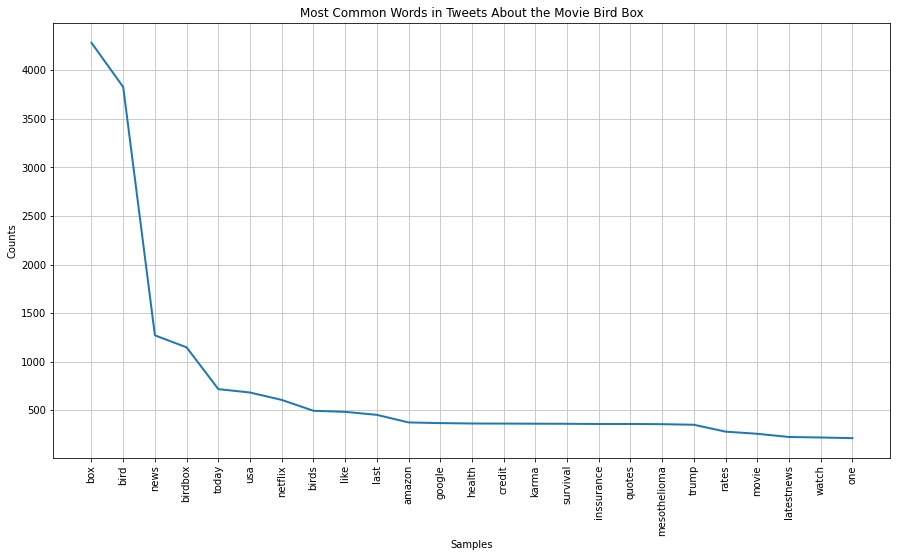

In [93]:
#plot top 25 words
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Bird Box")

In [95]:
# from fdist.most_common(25) seperate words and counts
birdbox_words = [x[0] for x in fdist.most_common(25)]
birdbox_counts = [x[1] for x in fdist.most_common(25)]

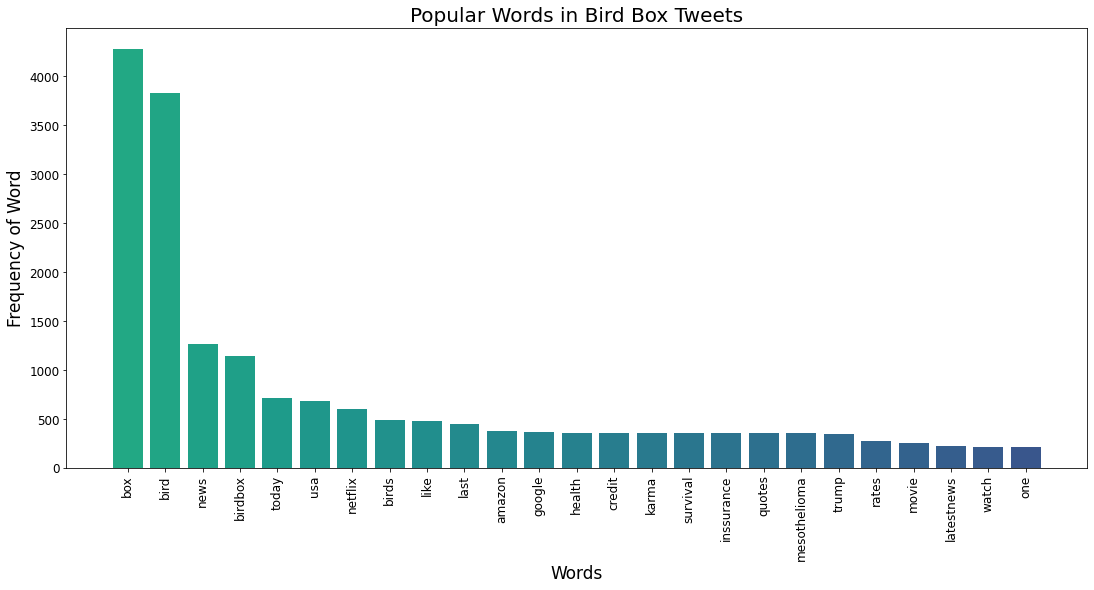

In [96]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(birdbox_words, birdbox_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Bird Box Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barbirdbox.png')

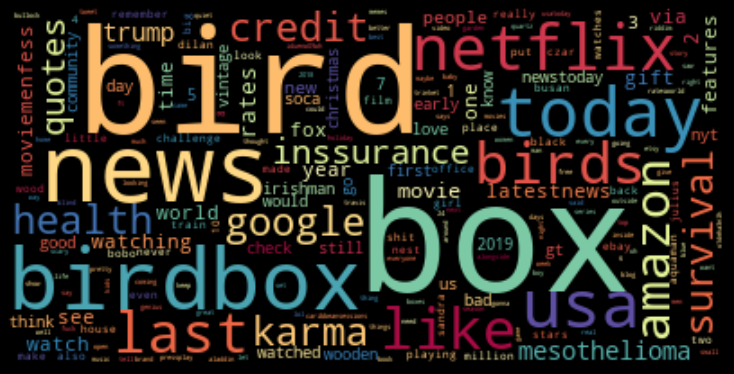

In [185]:
# Create the word cloud
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# create matplotlib image 
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudbirdbox.png')

# Silver Linings Playbook

In [17]:
#gather tweets from the movie Silver Linings Playbook
c = twint.Config()
c.Search = "Silver Linings Playbook"
c.Limit = 6000
c.Since = "2012-11-16" #released November 16, 2012
c.Until = "2013-11-16"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [187]:
#create Silver Linings Playbook dataframe
df_13 = twint.storage.panda.Tweets_df

In [188]:
#remove non-English tweets from the dataframe
df_13 = df_13[df_13['language'] == 'en']
df_13.shape #shape after non-English tweets are removed

(5277, 38)

Uncomment and run the following cell to save df_13 to a csv

In [189]:
# df_13.to_csv('df_13.csv')

Uncomment and run the following cell to read in df_13

In [63]:
# df_13 = pd.read_csv('df_13.csv')

In [64]:
#tokenize isolated tweets
tokenized_tweets = []
for tweet in df_13['tweet'].values:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower()))

In [65]:
#isolate each word in tweet
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [100]:
#frequency of words within Silver Linings Playbook
FreqDist(tweets).most_common(25)

[('silver', 4857),
 ('linings', 4831),
 ('playbook', 4816),
 ('movie', 630),
 ('watching', 625),
 ('silverliningsplaybook', 494),
 ('watch', 419),
 ('good', 393),
 ('film', 329),
 ('love', 310),
 ('watched', 278),
 ('jennifer', 262),
 ('lawrence', 262),
 ('time', 223),
 ('cooper', 220),
 ('like', 219),
 ('gt', 219),
 ('bradley', 216),
 ('one', 188),
 ('great', 172),
 ('best', 171),
 ('movies', 170),
 ('3', 139),
 ('really', 131),
 ('favorite', 128)]

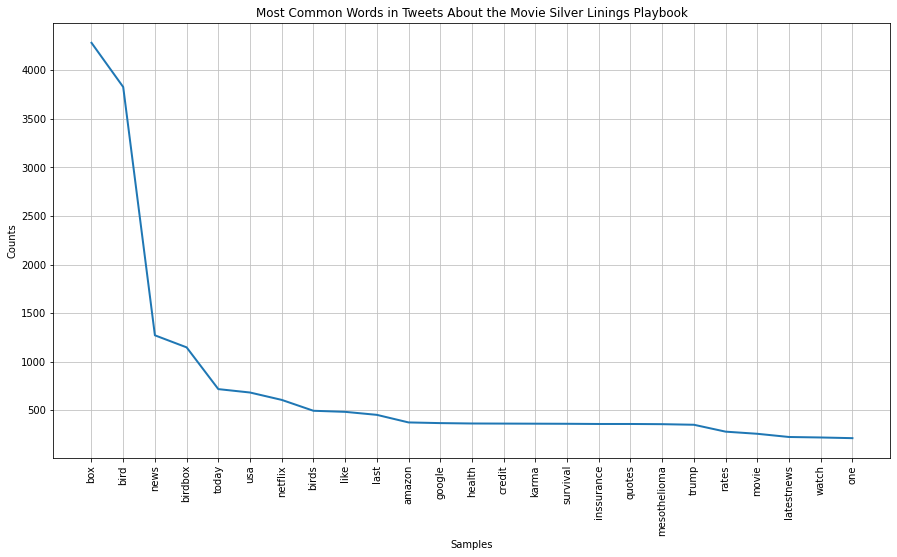

In [101]:
#plot 25 most common words in Silver Linings Playbook
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Silver Linings Playbook")

In [102]:
# from fdist.most_common(25) seperate words and counts
silver_words = [x[0] for x in fdist.most_common(25)]
silver_counts = [x[1] for x in fdist.most_common(25)]

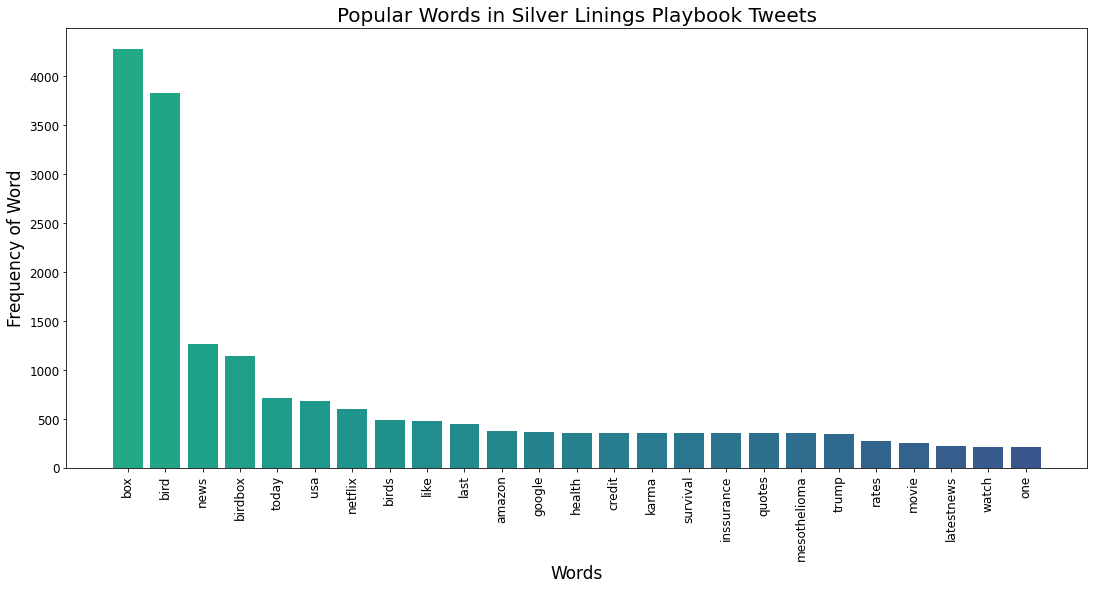

In [103]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(silver_words, silver_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Silver Linings Playbook Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/bar17silver.png')

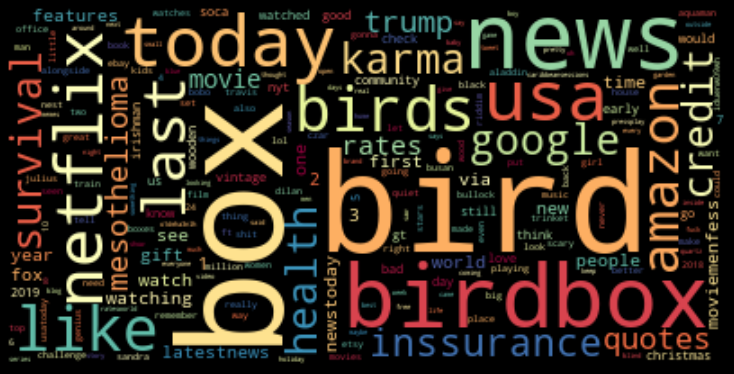

In [194]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudsilverplaybook.png')

# Django Unchained

In [18]:
#gather tweets from the movie Django Unchained
c = twint.Config()
c.Search = "Django Unchained"
c.Limit = 6500
c.Since = "2012-12-25" #released December 15, 2012
c.Until = "2013-12-25"
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [89]:
#create Django Unchained dataframe
df_14 = twint.storage.panda.Tweets_df

In [90]:
#remove non-Engish tweets
df_14 = df_14[df_14['language'] == 'en']

In [91]:
#observe how many tweets remain
df_14.shape

(4905, 38)

Uncomment and run the following cell to save df_14 to a csv

In [92]:
# df_14.to_csv('df_14.csv')

Uncomment and run the following cell to read in df_14

In [66]:
# df_14 = pd.read_csv('df_14.csv')

In [67]:
#tokenize tweets
tokenized_tweets = []
for tweet in df_14['tweet'].values:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #make each tweet lowercase to avoid duplicates
       
# print(tokenized_tweets)

In [68]:
#isolate each word
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list: #don't include stop words in list
            tweets.append(word)  

# tweets

In [107]:
#frequency of words within Django Unchained
fdist = FreqDist(tweets)

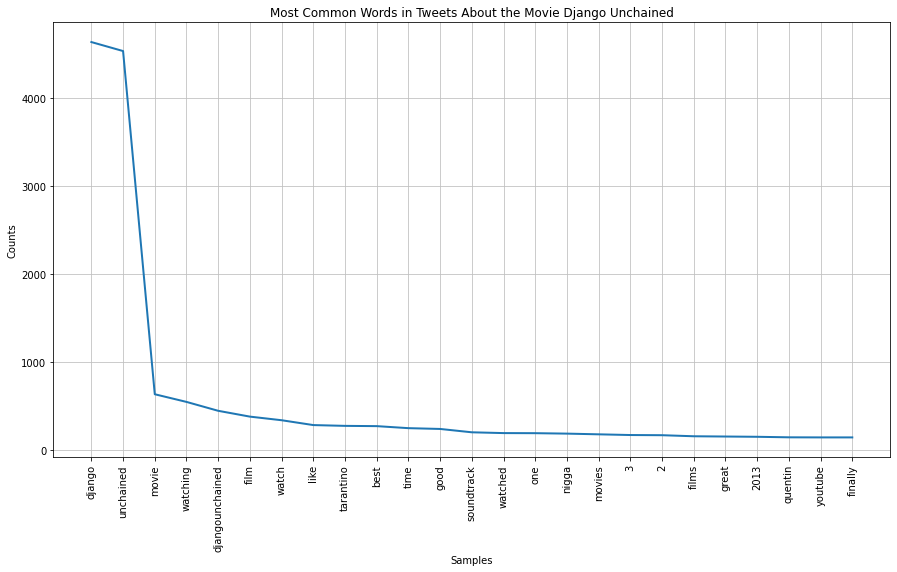

In [108]:
#plot top 25 words used in tweets about Django Unchained
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Django Unchained")

In [109]:
# from fdist.most_common(25) seperate words and counts
django_words = [x[0] for x in fdist.most_common(25)]
django_counts = [x[1] for x in fdist.most_common(25)]

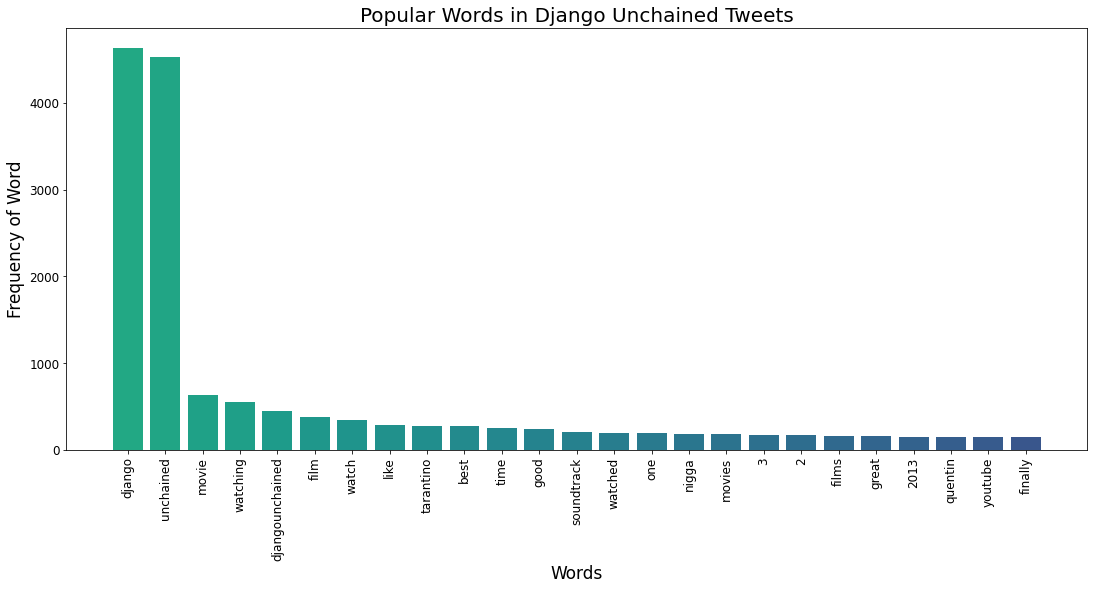

In [110]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(django_words, django_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Django Unchained Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/bardjango.png')

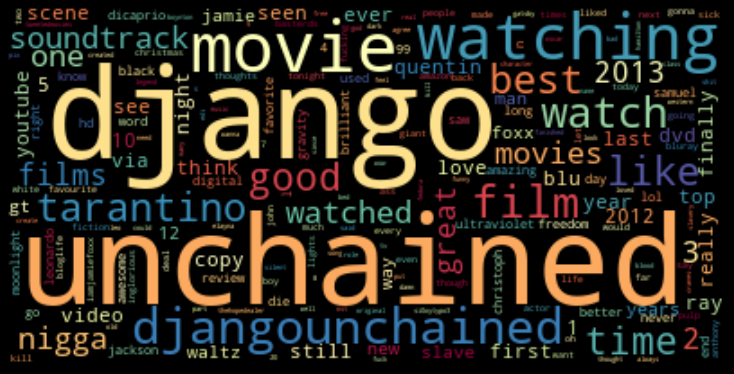

In [98]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display matplotlib image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/clouddjango.png')

# Hocus Pocus

In [69]:
#Hocus Pocus was released July 16, 1993. Honestly, shocking a Halloween movie was released in the summer. 
#gather tweets from the movie Hocus Pocus
c = twint.Config()
c.Search = "Hocus Pocus"
c.Limit = 6000
c.Since = "2014-10-01" #October is the month of Halloween
c.Until = "2015-10-01" #date chosen before 2019 so there would not be conflicts with tweets about Hocus Pocus 2 (announced 2019)
c.Pandas = True

# Uncommonet the following line to run
# twint.run.Search(c)

In [17]:
#create dataframe for Hocus Pocus tweets
df_15 = twint.storage.panda.Tweets_df

In [18]:
# Remove non-English tweets
df_15 = df_15[df_15['language'] == 'en']
df_15.shape

(5632, 38)

Uncomment and run the following cell to save df_15 to a csv

In [19]:
# df_15.to_csv('df_15.csv')

Uncomment and run the following cell to read in df_15

In [70]:
# df_15 = pd.read_csv('df_15.csv')

In [71]:
tweets_Hocus = df_15['tweet'].values

In [72]:
tokenized_tweets = []
for tweet in tweets_Hocus:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower()))

In [73]:
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

# tweets

In [115]:
fdist = FreqDist(tweets)

In [116]:
fdist.most_common(25)

[('hocus', 5154),
 ('pocus', 5140),
 ('halloween', 847),
 ('watch', 771),
 ('hocuspocus', 594),
 ('movie', 382),
 ('watching', 378),
 ('chill', 292),
 ('halloweentown', 278),
 ('like', 239),
 ('time', 239),
 ('october', 221),
 ('movies', 196),
 ('fall', 194),
 ('wait', 194),
 ('disney', 176),
 ('never', 169),
 ('love', 169),
 ('town', 167),
 ('want', 165),
 ('put', 158),
 ('show', 158),
 ('see', 145),
 ('spell', 142),
 ('night', 142)]

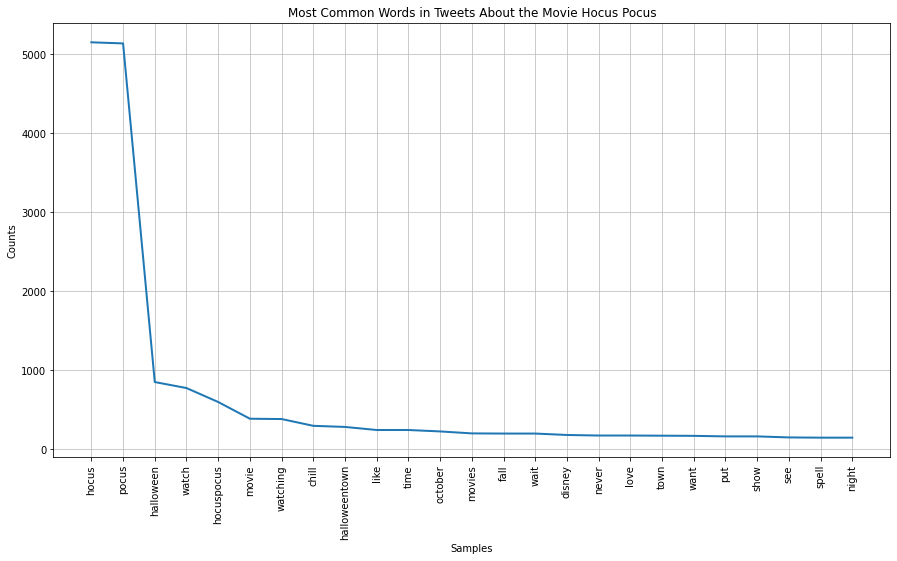

In [117]:
#line plot
fig, ax = plt.subplots(1,1, figsize=(15,8)) 
ax = fdist.plot(25, title="Most Common Words in Tweets About the Movie Hocus Pocus")

In [118]:
# from fdist.most_common(25) seperate words and counts
hocuspocus_words = [x[0] for x in fdist.most_common(25)]
hocuspocus_counts = [x[1] for x in fdist.most_common(25)]

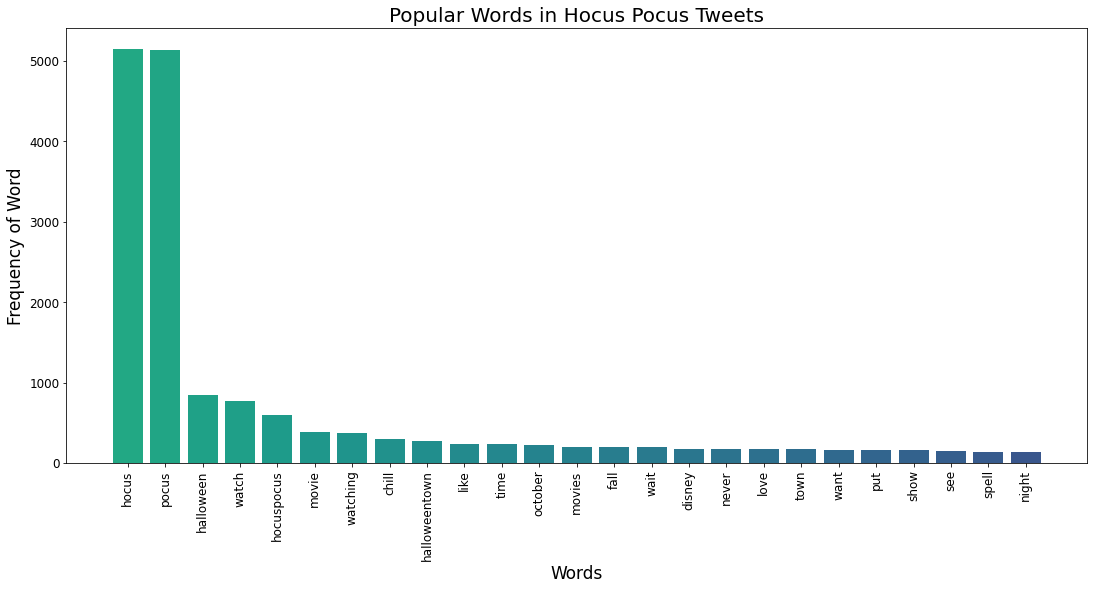

In [119]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(hocuspocus_words, hocuspocus_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Frequency of Word', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Hocus Pocus Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('images/barhocuspocus.png')

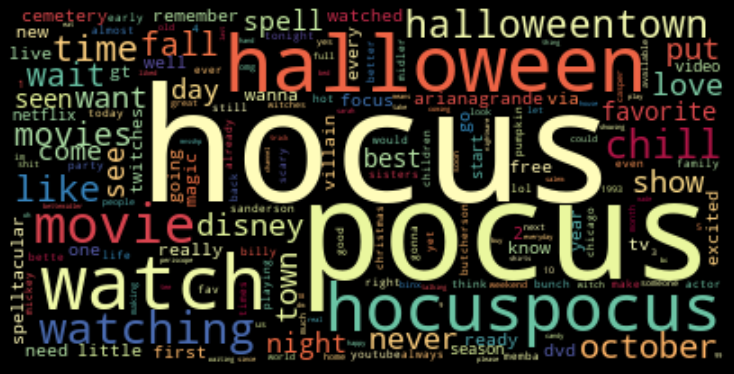

In [121]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display matplotlib image:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/cloudhocuspocus.png')